# Chat Analysis
## 🔥Tobia x Shuyan🔥
### Between 13.05.2023 - 01-09-2023

---------------------- Dear 书言 ---------------------- <br>
Hey Shuyan! I hope you doing great darling ♥️<br>
You know I love data and my work is data.<br>
So I decided to use my skills to analyze our chat.<br>
I hope you find it interesting. I had much fun doing that!<br>
--------------------------------------------------------<br>
<br>


Features:
- Since when
- Average messages per day
    - All
    - Text
    - Picture
    - Video
    - Audio
- Verlauf der Anzahl pro Tag (Line-Plot)
    - All
    - Text
    - Picture
    - Video
    - Audio
- Most used words, emojis, Stickers
- How many messages
    - Complete
    - From me
    - From her
- Streak -> Longest conversation without a day without writting
- Wordcloud from our chat

---

### preparation

In [1]:
# imports
import os

import json
from datetime import datetime, timedelta
from copy import deepcopy
import math

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import PIL.Image
import numpy as np

import jieba    # for chinese wordcloud
import string

import pdfkit

from joblib import Parallel, delayed

In [2]:
# variables

text_complete = ""    # for wordcloud

amount_text_msg = 0
text_msg_per_day = dict()   # "11.05.2023: 0"
text_msg_per_day_from_me = dict()
text_msg_per_day_from_her = dict()

words = dict()
amount_words = 0
words_per_day = dict()
words_per_day_from_me = dict()
words_per_day_from_her = dict()

pictures = dict()
amount_picture_msg = 0
pictures_per_day = dict()
pictures_per_day_from_me = dict()
pictures_per_day_from_her = dict()

sticker = dict()
amount_sticker_msg = 0
sticker_per_day = dict()
sticker_per_day_from_me = dict()
sticker_per_day_from_her = dict()

animations = dict()
amount_animations_msg = 0
animations_per_day = dict()
animations_per_day_from_me = dict()
animations_per_day_from_her = dict()

video = dict()
amount_video_msg = 0
video_per_day = dict()
video_per_day_from_me = dict()
video_per_day_from_her = dict()

audio = dict()
amount_audio_msg = 0
audio_per_day = dict()
audio_per_day_from_me = dict()
audio_per_day_from_her = dict()

emoji = dict()
amount_emojis = 0
emoji_per_day = dict()
emoji_per_day_from_me = dict()
emoji_per_day_from_her = dict()

amount_msg = 0
amount_msg_from_me = 0
amount_msg_from_her = 0
amount_msg_per_day = dict()
amount_msg_from_me_per_day = dict()
amount_msg_from_her_per_day = dict()

longest_streak_in_days = None
longest_streak_first_date = None
longest_streak_last_date = None
first_streak_day = None
last_streak_day = None
cur_streak = None

# constants
MY_NAME = "Tobia Ippolito"
MY_ID = "user6101173526"
HER_NAME = "Liu Shuyan 😊😍☺️😇🌕🌹💐"
HER_ID = "user6118080449"
FROM_DATE = "2023-05-13"
DATE = "2023-09-01"
GROUND_PATH = "D:/BACKUP/Liu Shuyan"
PARALLEL_COMPUTING = True

In [3]:
#laden von Slowly Daten => von FROM_DATE!


In [4]:
# load from whtsapp

In [5]:
# load from Instagram

In [6]:
# load from WeChat

In [7]:
EMOJIS = [
    "😀", "😃", "😄", "😁", "😆", "😅", "😂", "🤣", "😊", "😇", "🙂", "🙃", "😉", "😌", "😍",
    "🥰", "😘", "😗", "😙", "😚", "😋", "😛", "😝", "😜", "🤪", "🤨", "🧐", "🤓", "😎", "🤩", "🥳",
    "😏", "😒", "😞", "😔", "😟", "😕", "🙁", "☹️", "😣", "😖", "😫", "😩", "🥺", "😢", "😭", "😤",
    "😠", "😡", "🤬", "🤯", "😳", "🥵", "🥶", "😱", "😨", "😰", "😥", "😓", "🤗", "🤔", "🤭", "🤫",
    "🤥", "😶", "😐", "😑", "😬", "🙄", "😯", "😦", "😧", "😮", "😲", "🥱", "😴", "🤤", "😪", "😵",
    "🤐", "🥴", "🤢", "🤮", "🤧", "😷", "🤒", "🤕", "🤑", "🤠", "😈", "👿", "👹", "👺", "🤡", "💩",
    "👻", "💀", "☠️", "👽", "👾", "🤖", "🎃", "😺", "😸", "😹", "😻", "😼", "😽", "🙀", "😿", "😾",
    "🙈", "🙉", "🙊", "💋", "💌", "💘", "💝", "💖", "💗", "💓", "💞", "💕", "💟", "❣️", "💔", "❤️",
    "🧡", "💛", "💚", "💙", "💜", "🤎", "🖤", "🤍", "💯", "💢", "💥", "🔥", "🕳️", "💤", "🗨️", "👋",
    "✋", "🤚", "🖐️", "✋", "👌", "🤏", "✌️", "🤞", "🤟", "🤘", "🤙", "👈", "👉", "👆", "🖕", "👇",
    "☝️", "👍", "👎", "✊", "👊", "🤛", "🤜", "👏", "🙌", "👐", "🤲", "🙏", "✍️", "💅", "🤳", "💪",
    "🦵", "🦶", "👂", "🦻", "👃", "👶", "🧒", "👦", "👧", "🧑", "👱", "👨", "🧔", "👨‍🦰", "👨‍🦱", "👨‍🦳",
    "👨‍🦲", "👩", "👩‍🦰", "👩‍🦱", "👩‍🦳", "👩‍🦲", "🧑‍🦰", "🧑‍🦱", "🧑‍🦳", "🧑‍🦲", "👱‍♀️", "👱‍♂️", "🧓", "👴", "👵",
    "🙍", "🙍‍♂️", "🙍‍♀️", "🙎", "🙎‍♂️", "🙎‍♀️", "🙅", "🙅‍♂️", "🙅‍♀️", "🙆", "🙆‍♂️", "🙆‍♀️", "💁", "💁‍♂️", "💁‍♀️", "🙋",
    "🙋‍♂️", "🙋‍♀️", "🧏", "🧏‍♂️", "🧏‍♀️", "🙇", "🙇‍♂️", "🙇‍♀️", "🤦", "🤦‍♂️", "🤦‍♀️", "🤷", "🤷‍♂️", "🤷‍♀️", "👨‍⚕️", "👩‍⚕️",
    "👨‍🎓", "👩‍🎓", "👨‍🏫", "👩‍🏫", "👨‍⚖️", "👩‍⚖️", "👨‍🌾", "👩‍🌾", "👨‍🍳", "👩‍🍳", "👨‍🔧", "👩‍🔧", "👨‍🏭", "👩‍🏭", "👨‍💼", "👩‍💼", "👨‍🔬",
    "👩‍🔬", "👨‍💻", "👩‍💻", "👨‍🎤", "👩‍🎤", "👨‍🎨", "👩‍🎨", "👨‍✈️", "👩‍✈️", "👨‍🚀", "👩‍🚀", "👨‍🚒", "👩‍🚒", "👮", "👮‍♂️", "👮‍♀️", "🕵️", "🕵️‍♂️",
    "🕵️‍♀️", "💂", "💂‍♂️", "💂‍♀️", "👷", "👷‍♂️", "👷‍♀️", "🤴", "👸", "👳", "👳‍♂️", "👳‍♀️", "👲", "🧕", "🤵", "👰",
    "🤰", "🤱", "👼", "🎅", "🤶", "🦸", "🦸‍♂️", "🦸‍♀️", "🦹", "🦹‍♂️", "🦹‍♀️", "🧙", "🧙‍♂️", "🧙‍♀️", "🧚", "🧚‍♂️", "🧚‍♀️",
    "🧛", "🧛‍♂️", "🧛‍♀️", "🧜", "🧜‍♂️", "🧜‍♀️", "🧝", "🧝‍♂️", "🧝‍♀️", "🧞", "🧞‍♂️", "🧞‍♀️", "🧟", "🧟‍♂️", "🧟‍♀️", "💆", "💆‍♂️",
    "💆‍♀️", "💇", "💇‍♂️", "💇‍♀️", "🚶", "🚶‍♂️", "🚶‍♀️", "🧍", "🧍‍♂️", "🧍‍♀️", "🧎", "🧎‍♂️", "🧎‍♀️", "🧑‍🦯", "👨‍🦯", "👩‍🦯", "🧑‍🦼",
    "👨‍🦼", "👩‍🦼", "🧑‍🦽", "👨‍🦽", "👩‍🦽", "🏃", "🏃‍♂️", "🏃‍♀️", "💃", "🕺", "🕴️", "👯", "👯‍♂️", "👯‍♀️", "🧖", "🧖‍♂️", "🧖‍♀️",
    "🧘", "🧑‍🤝‍🧑", "👭", "👫", "👬", "💏", "👨‍❤️‍💋‍👨", "👩‍❤️‍💋‍👩", "💑", "👨‍❤️‍👨", "👩‍❤️‍👩", "👪", "👨‍👩‍👦", "👨‍👩‍👧", "👨‍👩‍👧‍👦", "👨‍👩‍👦‍👦", "👨‍👩‍👧‍👧", "👨‍👨‍👦", "👨‍👨‍👧", "👨‍👨‍👧‍👦", "👨‍👨‍👦‍👦", "👨‍👨‍👧‍👧", "👩‍👩‍👦", "👩‍👩‍👧", "👩‍👩‍👧‍👦", "👩‍👩‍👦‍👦", "👩‍👩‍👧‍👧", "👨‍👦", "👨‍👦‍👦", "👨‍👧",
    "👨‍👧‍👦", "👨‍👧‍👧", "👩‍👦", "👩‍👦‍👦", "👩‍👧", "👩‍👧‍👦", "👩‍👧‍👧", "🗣️", "👤", "👥"
]

In [8]:
# helper functions
def convert_unixtime_in_date(unixtime:int, american_format=False):
    if type(unixtime) != int:
        unixtime = int(unixtime)

    dt = datetime.fromtimestamp(unixtime)
    if american_format:
        res = f"{dt.year}-{dt.month:02d}-{dt.day:02d}"
    else:
        res = f"{dt.day:02d}.{dt.month:02d}.{dt.year}"
    return res

def convert_date_in_unixtime(date:str, american_format=False):
    if american_format:
        date_format = "%Y-%m-%d"
    else:
        date_format = "%d.%m.%Y"

    dt = datetime.strptime(date, date_format)
    return int(dt.timestamp())

print(convert_unixtime_in_date(1683928800))
print(convert_unixtime_in_date(1683928800, american_format=True))
print(convert_date_in_unixtime('13.05.2023'))
print(convert_date_in_unixtime('2023-05-13', american_format=True))

def get_date_between(first_date:str, second_date:str, american_format=False) -> list:
    if american_format:
        date_format = "%Y-%m-%d"
    else:
        date_format = "%d.%m.%Y"

    dt_1 = datetime.strptime(first_date, date_format)
    dt_2 = datetime.strptime(second_date, date_format)

    res = []
    for cur_day in range((dt_2-dt_1).days + 1):
        cur_dt = dt_1 + timedelta(days=cur_day)
        if american_format:
            cur_res = f"{cur_dt.year}-{cur_dt.month:02d}-{cur_dt.day:02d}"
        else:
            cur_res = f"{cur_dt.day:02d}.{cur_dt.month:02d}.{cur_dt.year}"
        res += [cur_res]
    return res

def get_days_between(first_date:str, second_date:str, american_format=False):
    dates = get_date_between(first_date, second_date, american_format)
    return max(0, len(dates)-1)

print(get_date_between("13.05.2023", "13.06.2023"))
print(get_date_between("2023-05-13", "2023-06-13", american_format=True))
print(get_days_between("13.05.2023", "13.06.2023"))
print(get_days_between("13.05.2023", "13.05.2023"))
print(get_days_between("13.05.2023", "12.05.2023"))
print(get_days_between("13.05.2023", "14.05.2023"))

def increase_dict_counter(target_dict:dict, key:str, amount=1) -> dict:
    cur_dict = deepcopy(target_dict)
    if key in cur_dict.keys():
        cur_dict[key] += amount
    else:
        cur_dict[key] = amount

    return cur_dict

test_dict = {"hallo":50}
test_dict_2 = increase_dict_counter(test_dict, "hallo")
test_dict_2 = increase_dict_counter(test_dict_2, "moin")
print(test_dict)
print(test_dict_2)

def get_emojis_in_str(text:str) -> dict:
    founded_emojis = dict()
    for char in text:
        if char in EMOJIS:
            founded_emojis = increase_dict_counter(founded_emojis, char)
    return founded_emojis

print(get_emojis_in_str("Test Sentence 1"))
print(get_emojis_in_str(""))
print(get_emojis_in_str("Test Sentence 1 😇"))
print(get_emojis_in_str("❤️"))
print(get_emojis_in_str("Test Sentence 1 😇. And another one 😇🥰❤️"))

def get_words_in_str(text:str) -> tuple:
    to_remove = [".", ",", "!", "?"] + EMOJIS
    for rm_elem in to_remove:
        text = text.replace(rm_elem, "")
    words = text.split(" ")

    words_dict = dict()
    for cur_word in words:
        if len(cur_word) > 0:
            words_dict = increase_dict_counter(words_dict, cur_word)
    return words_dict

print(get_words_in_str("Hey, wie geht es dir?🥰"))

def merge_dicts(dict_1, dict_2):
    dict_1 = deepcopy(dict_1)
    dict_2 = deepcopy(dict_2)

    for key, value in dict_2.items():
        if key in dict_1.keys():
            dict_1[key] += value
        else:
            dict_1[key] = value
    return dict_1

print(merge_dicts({"a":3, "b":4}, {"b":3, "c":24}))

13.05.2023
2023-05-13
1683928800
1683928800
['13.05.2023', '14.05.2023', '15.05.2023', '16.05.2023', '17.05.2023', '18.05.2023', '19.05.2023', '20.05.2023', '21.05.2023', '22.05.2023', '23.05.2023', '24.05.2023', '25.05.2023', '26.05.2023', '27.05.2023', '28.05.2023', '29.05.2023', '30.05.2023', '31.05.2023', '01.06.2023', '02.06.2023', '03.06.2023', '04.06.2023', '05.06.2023', '06.06.2023', '07.06.2023', '08.06.2023', '09.06.2023', '10.06.2023', '11.06.2023', '12.06.2023', '13.06.2023']
['2023-05-13', '2023-05-14', '2023-05-15', '2023-05-16', '2023-05-17', '2023-05-18', '2023-05-19', '2023-05-20', '2023-05-21', '2023-05-22', '2023-05-23', '2023-05-24', '2023-05-25', '2023-05-26', '2023-05-27', '2023-05-28', '2023-05-29', '2023-05-30', '2023-05-31', '2023-06-01', '2023-06-02', '2023-06-03', '2023-06-04', '2023-06-05', '2023-06-06', '2023-06-07', '2023-06-08', '2023-06-09', '2023-06-10', '2023-06-11', '2023-06-12', '2023-06-13']
31
0
0
1
{'hallo': 50}
{'hallo': 51, 'moin': 1}
{}
{}
{'😇'

In [9]:
# get newest date
dates = []
most_current_day = convert_date_in_unixtime("2023-05-13", american_format=True)
for elem in os.listdir(GROUND_PATH):
    splitted_elem = elem.split("-")
    if len(splitted_elem) == 3:
        year = int(splitted_elem[0].split("_")[-1])
        month = int(splitted_elem[1])
        if len(splitted_elem[2]) > 2:
            day = int(splitted_elem[2].split(" ")[0])
        else:
            day = int(splitted_elem[2])
        cur_date = convert_date_in_unixtime(f"{day}.{month}.{year}")
        if most_current_day < cur_date:
            most_current_day = cur_date
DATE = convert_unixtime_in_date(most_current_day, american_format=True)

PATH = f"{GROUND_PATH}/ChatExport_{DATE} (JSON)"
if os.path.exists(PATH) == False:
    PATH = f"D:/BACKUP/Liu Shuyan/ChatExport_{DATE}"
    if os.path.exists(PATH) == False:
        raise Exception("Chat not found!")

In [10]:
FROM_DATE_NOT_AMERICAN = convert_unixtime_in_date(convert_date_in_unixtime(FROM_DATE, american_format=True))
DATE_NOT_AMERICAN = convert_unixtime_in_date(convert_date_in_unixtime(DATE, american_format=True))
DATE_NOT_AMERICAN

'01.09.2023'

In [11]:
def create_copy(*iter):
    result = []
    for elem in iter:
        result += [deepcopy(elem)]
    return result

def collect_stats(message, cur_date, media_name_dict, amount_media_msg, media_per_day, media_per_day_from_me, media_per_day_from_her, is_message_from_me):
    message, cur_date, media_name_dict, amount_media_msg, media_per_day, media_per_day_from_me, media_per_day_from_her = create_copy(message, cur_date, media_name_dict, amount_media_msg, media_per_day, media_per_day_from_me, media_per_day_from_her)
    
    media_name_dict = increase_dict_counter(media_name_dict, message["file"])
    amount_media_msg += 1
    media_per_day = increase_dict_counter(media_per_day, cur_date)
    if is_message_from_me != None:
        if is_message_from_me:
            media_per_day_from_me = increase_dict_counter(media_per_day_from_me, cur_date)
        else:
            media_per_day_from_her = increase_dict_counter(media_per_day_from_her, cur_date)

    return (media_name_dict, amount_media_msg, media_per_day, 
            media_per_day_from_me, media_per_day_from_her)

In [12]:
def to_int(number):
    return int(round(number, 0))

to_int(0.78)

1

In [13]:
def calc_mean(input_dict:dict, should_round=True):
    value = 0
    amount = 0
    for cur_value in input_dict.values():
        amount += 1
        value += cur_value
    if amount == 0:
        return value

    res = value/amount

    if should_round:
        res = to_int(res)
    return res

def get_elem_with_top_amount(input_dict:dict, amount=5, sort_key=lambda x:-x[1], reserve=False):
    elems = list(input_dict.items())
    elems = sorted(elems, key=sort_key, reverse=reserve)
    return elems[:amount]

print(get_elem_with_top_amount({"a":3, "b":10, "c":4, "d":2}, amount=2))
print(get_elem_with_top_amount({"a":3, "b":10, "c":4, "d":2}, sort_key=lambda x:x[1]))

[('b', 10), ('c', 4)]
[('d', 2), ('a', 3), ('c', 4), ('b', 10)]


In [14]:
def convert_dict_as_date_sorted_list(input_dict:dict, american_format=False, reverse=False) -> tuple:
    cur_dict = list(input_dict.items())
    cur_dict = sorted(cur_dict, key=lambda x:convert_date_in_unixtime(x[0], american_format=american_format), reverse=reverse)
    return list(zip(*cur_dict))

print(convert_dict_as_date_sorted_list({"19.02.2023":2, "19.02.2022":5, "19.05.2022":10}))

[('19.02.2022', '19.05.2022', '19.02.2023'), (5, 10, 2)]


In [15]:
def replace_elems_in_str(input_str:str, elems:list, replace_elem=""):
    new_str = input_str
    for elem_to_replace in elems:
        new_str = new_str.replace(elem_to_replace, replace_elem)
    return new_str

---

### load chat

In [16]:
with open(f"{PATH}/result.json", "r", encoding="utf8") as file:
    chat = json.load(file)

In [17]:
#chat

In [18]:
chat.keys()

dict_keys(['name', 'type', 'id', 'messages'])

In [19]:
chat["name"]

'Liu Shuyan'

In [20]:
chat["type"]

'personal_chat'

In [21]:
chat["id"]

6118080449

In [22]:
#chat["messages"]

In [23]:
len(chat["messages"])

55889

In [24]:
# get every type of message and the attributes of it
types = dict()
attributes = dict()
all_messages = len(chat["messages"])
for message in chat["messages"]:
    for key in message.keys():
        if key in attributes.keys():
            attributes[key] += 1
        else:
            attributes[key] = 1

    if "media_type" in message.keys() and message["media_type"] not in types.keys():
        types[message["media_type"]] = message["media_type"]

txt_res = "Attributes of messages:\n\n\nAll message have:"
first_elem_which_have_not_all = True
for key, value in sorted(list(attributes.items()), key=lambda x:-x[1]):
    if first_elem_which_have_not_all and value/all_messages < 1:
            first_elem_which_have_not_all = False
            txt_res += "\n\nNot all have:"
    txt_res += f"\n- {key} ({round((value/all_messages)*100, 2)}%)"
print(txt_res)

Attributes of messages:


All message have:
- id (100.0%)
- type (100.0%)
- date (100.0%)
- date_unixtime (100.0%)
- text (100.0%)
- text_entities (100.0%)

Not all have:
- from (99.98%)
- from_id (99.98%)
- reply_to_message_id (38.49%)
- width (17.22%)
- height (17.22%)
- edited (16.79%)
- edited_unixtime (16.79%)
- file (13.82%)
- media_type (13.81%)
- thumbnail (11.99%)
- sticker_emoji (9.34%)
- photo (5.19%)
- duration_seconds (4.39%)
- mime_type (4.39%)
- actor (0.02%)
- actor_id (0.02%)
- action (0.02%)
- discard_reason (0.02%)
- performer (0.01%)
- title (0.01%)
- forwarded_from (0.0%)


In [25]:
types.keys()

dict_keys(['sticker', 'video_file', 'video_message', 'voice_message', 'audio_file', 'animation'])

In [26]:
for message in chat["messages"]:
    #if "media_type" in message.keys() and message["media_type"] == "video_file":
    if "photo" in message.keys():
        print(message)
        break

{'id': 261, 'type': 'message', 'date': '2023-05-13T16:55:21', 'date_unixtime': '1683989721', 'from': 'Tobia Ippolito', 'from_id': 'user6101173526', 'photo': '(File not included. Change data exporting settings to download.)', 'width': 960, 'height': 1280, 'text': "I was just jogging...I'm so exhausted now 😯 I just will take a shower, eat something and later bake a cake ^^\n\nAnd I saw that the letter still needs some hours 😅", 'text_entities': [{'type': 'plain', 'text': "I was just jogging...I'm so exhausted now 😯 I just will take a shower, eat something and later bake a cake ^^\n\nAnd I saw that the letter still needs some hours 😅"}]}


Hint: reactions aren't available

---

### calculation

In [27]:
def merge_dict(dict_1:dict, dict_2:dict, is_list=False):
    new_dict = deepcopy(dict1)
    for key, value in dict_2:
        if key in new_dict.keys():
            if is_list:
                new_dict[key] += [value]
            else:
                new_dict[key] += value
        else:
            if is_list:
                new_dict[key] = [value]
            else:
                new_dict[key] = value
    return new_dict

class Chat_Stat:
    def __init__(self):
        self.text_complete = ""

        self.amount_text_msg = 0
        self.text_msg_per_day = dict()   # "11.05.2023: 0"
        self.text_msg_per_day_from_me = dict()
        self.text_msg_per_day_from_her = dict()

        self.words = dict()
        self.amount_words = 0
        self.words_per_day = dict()
        self.words_per_day_from_me = dict()
        self.words_per_day_from_her = dict()

        self.pictures = dict()
        self.amount_picture_msg = 0
        self.pictures_per_day = dict()
        self.pictures_per_day_from_me = dict()
        self.pictures_per_day_from_her = dict()

        self.sticker = dict()
        self.amount_sticker_msg = 0
        self.sticker_per_day = dict()
        self.sticker_per_day_from_me = dict()
        self.sticker_per_day_from_her = dict()

        self.animations = dict()
        self.amount_animations_msg = 0
        self.animations_per_day = dict()
        self.animations_per_day_from_me = dict()
        self.animations_per_day_from_her = dict()

        self.video = dict()
        self.amount_video_msg = 0
        self.video_per_day = dict()
        self.video_per_day_from_me = dict()
        self.video_per_day_from_her = dict()

        self.audio = dict()
        self.amount_audio_msg = 0
        self.audio_per_day = dict()
        self.audio_per_day_from_me = dict()
        self.audio_per_day_from_her = dict()

        self.emoji = dict()
        self.amount_emojis = 0
        self.emoji_per_day = dict()
        self.emoji_per_day_from_me = dict()
        self.emoji_per_day_from_her = dict()

        self.amount_msg = 0
        self.amount_msg_from_me = 0
        self.amount_msg_from_her = 0
        self.amount_msg_per_day = dict()
        self.amount_msg_from_me_per_day = dict()
        self.amount_msg_from_her_per_day = dict()

    def add_message(self, message):
        new_chat_stat = self.get_copy()
        if type(message["text"]) == str:
            text = message["text"]
        else:
            text = ""
            for elem in message["text"]:
                if type(elem) == str:
                    text += f"{elem}"

        cur_date = convert_unixtime_in_date(message["date_unixtime"])
        new_chat_stat.amount_msg += 1
        new_chat_stat.amount_msg_per_day = increase_dict_counter(new_chat_stat.amount_msg_per_day, cur_date)
        if "from_id" in message.keys():
            is_message_from_me = False
            if message["from_id"] == MY_ID:
                is_message_from_me = True
                new_chat_stat.amount_msg_from_me += 1
                new_chat_stat.amount_msg_from_me_per_day = increase_dict_counter(new_chat_stat.amount_msg_from_me_per_day, cur_date)
            else:
                new_chat_stat.amount_msg_from_her += 1
                new_chat_stat.amount_msg_from_her_per_day = increase_dict_counter(new_chat_stat.amount_msg_from_her_per_day, cur_date)
        else:
            is_message_from_me = None

        if "media_type" in message.keys():
            match message["media_type"]:
                case "sticker":
                    new_chat_stat.sticker, new_chat_stat.amount_sticker_msg, new_chat_stat.sticker_per_day, new_chat_stat.sticker_per_day_from_me, new_chat_stat.sticker_per_day_from_her \
                    = collect_stats(message, cur_date, new_chat_stat.sticker, new_chat_stat.amount_sticker_msg, new_chat_stat.sticker_per_day, new_chat_stat.sticker_per_day_from_me, new_chat_stat.sticker_per_day_from_her, is_message_from_me)
                case "video_file":
                    new_chat_stat.video, new_chat_stat.amount_video_msg, new_chat_stat.video_per_day, new_chat_stat.video_per_day_from_me, new_chat_stat.video_per_day_from_her \
                    = collect_stats(message, cur_date, new_chat_stat.video, new_chat_stat.amount_video_msg, new_chat_stat.video_per_day, new_chat_stat.video_per_day_from_me, new_chat_stat.video_per_day_from_her, is_message_from_me)
                case "video_message":
                    new_chat_stat.video, new_chat_stat.amount_video_msg, new_chat_stat.video_per_day, new_chat_stat.video_per_day_from_me, new_chat_stat.video_per_day_from_her \
                    = collect_stats(message, cur_date, new_chat_stat.video, new_chat_stat.amount_video_msg, new_chat_stat.video_per_day, new_chat_stat.video_per_day_from_me, new_chat_stat.video_per_day_from_her, is_message_from_me)
                case "audio_file":
                    new_chat_stat.audio, new_chat_stat.amount_audio_msg, new_chat_stat.audio_per_day, new_chat_stat.audio_per_day_from_me, new_chat_stat.audio_per_day_from_her \
                    = collect_stats(message, cur_date, new_chat_stat.audio, new_chat_stat.amount_audio_msg, new_chat_stat.audio_per_day, new_chat_stat.audio_per_day_from_me, new_chat_stat.audio_per_day_from_her, is_message_from_me)
                case "voice_message":
                    new_chat_stat.audio, new_chat_stat.amount_audio_msg, new_chat_stat.audio_per_day, new_chat_stat.audio_per_day_from_me, new_chat_stat.audio_per_day_from_her \
                    = collect_stats(message, cur_date, new_chat_stat.audio, new_chat_stat.amount_audio_msg, new_chat_stat.audio_per_day, new_chat_stat.audio_per_day_from_me, new_chat_stat.audio_per_day_from_her, is_message_from_me)
                case "animation":
                    new_chat_stat.animations, new_chat_stat.amount_animations_msg, new_chat_stat.animations_per_day, new_chat_stat.animations_per_day_from_me, new_chat_stat.animations_per_day_from_her \
                    = collect_stats(message, cur_date, new_chat_stat.animations, new_chat_stat.amount_animations_msg, new_chat_stat.animations_per_day, new_chat_stat.animations_per_day_from_me, new_chat_stat.animations_per_day_from_her, is_message_from_me)
                case _:
                    raise RuntimeError(f"An uncovered message media type was detected: '{message['media_type']}'")
            types[message["media_type"]] = message["media_type"]
        elif "photo" in message.keys():
            new_chat_stat.pictures = increase_dict_counter(new_chat_stat.pictures, message["photo"])
            new_chat_stat.amount_picture_msg += 1
            new_chat_stat.pictures_per_day = increase_dict_counter(new_chat_stat.pictures_per_day, cur_date)
            if is_message_from_me:
                new_chat_stat.pictures_per_day_from_me = increase_dict_counter(new_chat_stat.pictures_per_day_from_me, cur_date)
            else:
                new_chat_stat.pictures_per_day_from_her = increase_dict_counter(new_chat_stat.pictures_per_day_from_her, cur_date)
        else: # Only Text!
            new_chat_stat.amount_text_msg += 1
            new_chat_stat.text_msg_per_day = increase_dict_counter(new_chat_stat.text_msg_per_day, cur_date)
            if is_message_from_me:
                new_chat_stat.text_msg_per_day_from_me = increase_dict_counter(new_chat_stat.text_msg_per_day_from_me, cur_date)
            else:
                new_chat_stat.text_msg_per_day_from_her = increase_dict_counter(new_chat_stat.text_msg_per_day_from_her, cur_date)

        # check for text -> could be in every message!
        if len(text.replace(" ", "")) > 0: 
            new_chat_stat.text_complete += text

            # check emoji -> maybe not all emoji will detect
            founded_emojis = get_emojis_in_str(text)
            for emoji_elem, amount in founded_emojis.items():
                new_chat_stat.emoji = increase_dict_counter(new_chat_stat.emoji, emoji_elem, amount=amount)
                new_chat_stat.amount_emojis += amount
                new_chat_stat.emoji_per_day = increase_dict_counter(new_chat_stat.emoji_per_day, cur_date, amount=amount)
                if is_message_from_me:
                    new_chat_stat.emoji_per_day_from_me = increase_dict_counter(new_chat_stat.emoji_per_day_from_me, cur_date, amount=amount)
                else:
                    new_chat_stat.emoji_per_day_from_her = increase_dict_counter(new_chat_stat.emoji_per_day_from_her, cur_date, amount=amount)

            cur_words = get_words_in_str(text)
            for cur_word, amount in cur_words.items():
                new_chat_stat.words = increase_dict_counter(new_chat_stat.words, cur_word, amount=amount)
                new_chat_stat.amount_words += amount
                new_chat_stat.words_per_day = increase_dict_counter(new_chat_stat.words_per_day, cur_date, amount=amount)
                if is_message_from_me:
                    new_chat_stat.words_per_day_from_me = increase_dict_counter(new_chat_stat.words_per_day_from_me, cur_date, amount=amount)
                else:
                    new_chat_stat.words_per_day_from_her = increase_dict_counter(new_chat_stat.words_per_day_from_her, cur_date, amount=amount)
        return new_chat_stat

    def merge(self, other_obj):
        new_chat_stat = Chat_Stat()
        new_chat_stat.text_complete = self.text_complete + other_obj.text_complete

        new_chat_stat.amount_text_msg = self.amount_text_msg + other_obj.amount_text_msg
        new_chat_stat.text_msg_per_day = merge_dicts(self.text_msg_per_day, other_obj.text_msg_per_day)
        new_chat_stat.text_msg_per_day_from_me = merge_dicts(self.text_msg_per_day_from_me, other_obj.text_msg_per_day_from_me)
        new_chat_stat.text_msg_per_day_from_her = merge_dicts(self.text_msg_per_day_from_her, other_obj.text_msg_per_day_from_her)

        new_chat_stat.words = merge_dicts(self.words, other_obj.words)
        new_chat_stat.amount_words = self.amount_words + other_obj.amount_words
        new_chat_stat.words_per_day = merge_dicts(self.words_per_day, other_obj.words_per_day)
        new_chat_stat.words_per_day_from_me = merge_dicts(self.words_per_day_from_me, other_obj.words_per_day_from_me)
        new_chat_stat.words_per_day_from_her = merge_dicts(self.words_per_day_from_her, other_obj.words_per_day_from_her)

        new_chat_stat.pictures = merge_dicts(self.pictures, other_obj.pictures)
        new_chat_stat.amount_picture_msg = self.amount_picture_msg + other_obj.amount_picture_msg
        new_chat_stat.pictures_per_day = merge_dicts(self.pictures_per_day, other_obj.pictures_per_day)
        new_chat_stat.pictures_per_day_from_me = merge_dicts(self.pictures_per_day_from_me, other_obj.pictures_per_day_from_me)
        new_chat_stat.pictures_per_day_from_her = merge_dicts(self.pictures_per_day_from_her, other_obj.pictures_per_day_from_her)

        new_chat_stat.sticker = merge_dicts(self.sticker, other_obj.sticker)
        new_chat_stat.amount_sticker_msg = self.amount_sticker_msg + other_obj.amount_sticker_msg
        new_chat_stat.sticker_per_day = merge_dicts(self.sticker_per_day, other_obj.sticker_per_day)
        new_chat_stat.sticker_per_day_from_me = merge_dicts(self.sticker_per_day_from_me, other_obj.sticker_per_day_from_me)
        new_chat_stat.sticker_per_day_from_her = merge_dicts(self.sticker_per_day_from_her, other_obj.sticker_per_day_from_her)

        new_chat_stat.animations = merge_dicts(self.animations, other_obj.animations)
        new_chat_stat.amount_animations_msg = self.amount_animations_msg + other_obj.amount_animations_msg
        new_chat_stat.animations_per_day = merge_dicts(self.animations_per_day, other_obj.animations_per_day)
        new_chat_stat.animations_per_day_from_me = merge_dicts(self.animations_per_day_from_me, other_obj.animations_per_day_from_me)
        new_chat_stat.animations_per_day_from_her = merge_dicts(self.animations_per_day_from_her, other_obj.animations_per_day_from_her)

        new_chat_stat.video = merge_dicts(self.video, other_obj.video)
        new_chat_stat.amount_video_msg = self.amount_video_msg + other_obj.amount_video_msg
        new_chat_stat.video_per_day = merge_dicts(self.video_per_day, other_obj.video_per_day)
        new_chat_stat.video_per_day_from_me = merge_dicts(self.video_per_day_from_me, other_obj.video_per_day_from_me)
        new_chat_stat.video_per_day_from_her = merge_dicts(self.video_per_day_from_her, other_obj.video_per_day_from_her)

        new_chat_stat.audio = merge_dicts(self.audio, other_obj.audio)
        new_chat_stat.amount_audio_msg = self.amount_audio_msg + other_obj.amount_audio_msg
        new_chat_stat.audio_per_day = merge_dicts(self.audio_per_day, other_obj.audio_per_day)
        new_chat_stat.audio_per_day_from_me = merge_dicts(self.audio_per_day_from_me, other_obj.audio_per_day_from_me)
        new_chat_stat.audio_per_day_from_her = merge_dicts(self.audio_per_day_from_her, other_obj.audio_per_day_from_her)

        new_chat_stat.emoji = merge_dicts(self.emoji, other_obj.emoji)
        new_chat_stat.amount_emojis = self.amount_emojis + other_obj.amount_emojis
        new_chat_stat.emoji_per_day = merge_dicts(self.emoji_per_day, other_obj.emoji_per_day)
        new_chat_stat.emoji_per_day_from_me = merge_dicts(self.emoji_per_day_from_me, other_obj.emoji_per_day_from_me)
        new_chat_stat.emoji_per_day_from_her = merge_dicts(self.emoji_per_day_from_her, other_obj.emoji_per_day_from_her)

        new_chat_stat.amount_msg = self.amount_msg + other_obj.amount_msg
        new_chat_stat.amount_msg_from_me = self.amount_msg_from_me + other_obj.amount_msg_from_me
        new_chat_stat.amount_msg_from_her = self.amount_msg_from_her + other_obj.amount_msg_from_her
        new_chat_stat.amount_msg_per_day = merge_dicts(self.amount_msg_per_day, other_obj.amount_msg_per_day)
        new_chat_stat.amount_msg_from_me_per_day = merge_dicts(self.amount_msg_from_me_per_day, other_obj.amount_msg_from_me_per_day)
        new_chat_stat.amount_msg_from_her_per_day = merge_dicts(self.amount_msg_from_her_per_day, other_obj.amount_msg_from_her_per_day)

        return new_chat_stat

    def get_copy(self):
        new_chat_stat = Chat_Stat()
        new_chat_stat.text_complete = self.text_complete
        new_chat_stat.amount_text_msg = self.amount_text_msg
        new_chat_stat.text_msg_per_day = self.text_msg_per_day
        new_chat_stat.text_msg_per_day_from_me = self.text_msg_per_day_from_me
        new_chat_stat.text_msg_per_day_from_her = self.text_msg_per_day_from_her
        new_chat_stat.words = self.words
        new_chat_stat.amount_words = self.amount_words
        new_chat_stat.words_per_day = self.words_per_day
        new_chat_stat.words_per_day_from_me = self.words_per_day_from_me
        new_chat_stat.words_per_day_from_her = self.words_per_day_from_her
        new_chat_stat.pictures = self.pictures
        new_chat_stat.amount_picture_msg = self.amount_picture_msg
        new_chat_stat.pictures_per_day = self.pictures_per_day
        new_chat_stat.pictures_per_day_from_me = self.pictures_per_day_from_me
        new_chat_stat.pictures_per_day_from_her = self.pictures_per_day_from_her
        new_chat_stat.sticker = self.sticker
        new_chat_stat.amount_sticker_msg = self.amount_sticker_msg
        new_chat_stat.sticker_per_day = self.sticker_per_day
        new_chat_stat.sticker_per_day_from_me = self.sticker_per_day_from_me
        new_chat_stat.sticker_per_day_from_her = self.sticker_per_day_from_her
        new_chat_stat.animations = self.animations
        new_chat_stat.amount_animations_msg = self.amount_animations_msg
        new_chat_stat.animations_per_day = self.animations_per_day
        new_chat_stat.animations_per_day_from_me = self.animations_per_day_from_me
        new_chat_stat.animations_per_day_from_her = self.animations_per_day_from_her
        new_chat_stat.video = self.video
        new_chat_stat.amount_video_msg = self.amount_video_msg
        new_chat_stat.video_per_day = self.video_per_day
        new_chat_stat.video_per_day_from_me = self.video_per_day_from_me
        new_chat_stat.video_per_day_from_her = self.video_per_day_from_her
        new_chat_stat.audio = self.audio
        new_chat_stat.amount_audio_msg = self.amount_audio_msg
        new_chat_stat.audio_per_day = self.audio_per_day
        new_chat_stat.audio_per_day_from_me = self.audio_per_day_from_me
        new_chat_stat.audio_per_day_from_her = self.audio_per_day_from_her
        new_chat_stat.emoji = self.emoji
        new_chat_stat.amount_emojis = self.amount_emojis
        new_chat_stat.emoji_per_day = self.emoji_per_day
        new_chat_stat.emoji_per_day_from_me = self.emoji_per_day_from_me
        new_chat_stat.emoji_per_day_from_her = self.emoji_per_day_from_her
        new_chat_stat.amount_msg = self.amount_msg
        new_chat_stat.amount_msg_from_me = self.amount_msg_from_me
        new_chat_stat.amount_msg_from_her = self.amount_msg_from_her
        new_chat_stat.amount_msg_per_day = self.amount_msg_per_day
        new_chat_stat.amount_msg_from_me_per_day = self.amount_msg_from_me_per_day
        new_chat_stat.amount_msg_from_her_per_day = self.amount_msg_from_her_per_day
        return new_chat_stat

    def get_values(self):
        return (self.text_complete,
                self.amount_text_msg,
                self.text_msg_per_day,
                self.text_msg_per_day_from_me,
                self.text_msg_per_day_from_her,
                self.words,
                self.amount_words,
                self.words_per_day,
                self.words_per_day_from_me,
                self.words_per_day_from_her,
                self.pictures,
                self.amount_picture_msg,
                self.pictures_per_day,
                self.pictures_per_day_from_me,
                self.pictures_per_day_from_her,
                self.sticker,
                self.amount_sticker_msg,
                self.sticker_per_day,
                self.sticker_per_day_from_me,
                self.sticker_per_day_from_her,
                self.animations,
                self.amount_animations_msg,
                self.animations_per_day,
                self.animations_per_day_from_me,
                self.animations_per_day_from_her,
                self.video,
                self.amount_video_msg,
                self.video_per_day,
                self.video_per_day_from_me,
                self.video_per_day_from_her,
                self.audio,
                self.amount_audio_msg,
                self.audio_per_day,
                self.audio_per_day_from_me,
                self.audio_per_day_from_her,
                self.emoji,
                self.amount_emojis,
                self.emoji_per_day,
                self.emoji_per_day_from_me,
                self.emoji_per_day_from_her,
                self.amount_msg,
                self.amount_msg_from_me,
                self.amount_msg_from_her,
                self.amount_msg_per_day,
                self.amount_msg_from_me_per_day,
                self.amount_msg_from_her_per_day)

In [28]:
all_messages = len(chat["messages"])

# for message in chat["messages"]:
def calculate_messages(input_messages):
    try:
        # init vars
        cur_chat_stat = Chat_Stat()

        for message in input_messages:
            cur_chat_stat = cur_chat_stat.add_message(message)

    except Exception as e:
        print(f"---------\nError occured:\n{e}\n---------")
    return cur_chat_stat
    # return (text_complete, amount_text_msg, text_msg_per_day, text_msg_per_day_from_me, text_msg_per_day_from_her,
    #         words, amount_words, words_per_day, words_per_day_from_me, words_per_day_from_her,
    #         pictures, amount_picture_msg, pictures_per_day, pictures_per_day_from_me, pictures_per_day_from_her,
    #         sticker, amount_sticker_msg, sticker_per_day, sticker_per_day_from_me, sticker_per_day_from_her,
    #         animations, amount_animations_msg, animations_per_day, animations_per_day_from_me, animations_per_day_from_her,
    #         video, amount_video_msg, video_per_day, video_per_day_from_me, video_per_day_from_her,
    #         audio, amount_audio_msg, audio_per_day, audio_per_day_from_me, audio_per_day_from_her,
    #         emoji, amount_emojis, emoji_per_day, emoji_per_day_from_me, emoji_per_day_from_her,
    #         amount_msg, amount_msg_from_me, amount_msg_from_her, amount_msg_per_day, amount_msg_from_me_per_day, amount_msg_from_her_per_day)
        

In [29]:
# create lists with multiple messages
message_packages = []
size = 1000
cur_package = []
cur_counter = 0
for message in chat["messages"]:
    if cur_counter < size:
        cur_package += [message]
        cur_counter += 1
    else:
        message_packages += create_copy(cur_package)
        cur_package = []
        cur_counter = 0
if cur_counter != 0:
    message_packages += create_copy(cur_package)
    cur_package = []
    cur_counter = 0

len(message_packages)

56

In [30]:
# run calculation
if PARALLEL_COMPUTING:
    results = Parallel(n_jobs=-1, verbose=10)(delayed(calculate_messages)(message_pack) for message_pack in message_packages)

    # results = []
    # for message_pack in message_packages:
    #     results += [calculate_messages(message_pack)]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done  31 out of  56 | elapsed:   23.5s remaining:   18.9s
[Parallel(n_jobs=-1)]: Done  37 out of  56 | elapsed:   29.7s remaining:   15.2s
[Parallel(n_jobs=-1)]: Done  43 out of  56 | elapsed:   32.6s remaining:    9.8s
[Parallel(n_jobs=-1)]: Done  49 out of  56 | elapsed:   34.5s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:   36.7s finished


In [31]:
if PARALLEL_COMPUTING:
    def combine_results(results:list):
        complete_res = Chat_Stat()
        for result in results:
            complete_res = complete_res.merge(result)
        return complete_res.get_values()
        

    #result = combine_results(results)
    text_complete, amount_text_msg, text_msg_per_day, text_msg_per_day_from_me, text_msg_per_day_from_her,\
    words, amount_words, words_per_day, words_per_day_from_me, words_per_day_from_her,\
    pictures, amount_picture_msg, pictures_per_day, pictures_per_day_from_me, pictures_per_day_from_her,\
    sticker, amount_sticker_msg, sticker_per_day, sticker_per_day_from_me, sticker_per_day_from_her,\
    animations, amount_animations_msg, animations_per_day, animations_per_day_from_me, animations_per_day_from_her,\
    video, amount_video_msg, video_per_day, video_per_day_from_me, video_per_day_from_her,\
    audio, amount_audio_msg, audio_per_day, audio_per_day_from_me, audio_per_day_from_her,\
    emoji, amount_emojis, emoji_per_day, emoji_per_day_from_me, emoji_per_day_from_her,\
    amount_msg, amount_msg_from_me, amount_msg_from_her, amount_msg_per_day, amount_msg_from_me_per_day, amount_msg_from_her_per_day = combine_results(results)

In [32]:
if PARALLEL_COMPUTING:
    # check streak
    for message in chat["messages"]:
        cur_date = convert_unixtime_in_date(message["date_unixtime"])
        if longest_streak_in_days == None:
            # initiliaze
            longest_streak_in_days = 1
            longest_streak_first_date = cur_date
            longest_streak_last_date = cur_date
            first_streak_day = cur_date
            last_streak_day = cur_date
            cur_streak = 1
        elif last_streak_day != cur_date:
            days_between = get_days_between(last_streak_day, cur_date)

            # check if streak is continue
            if days_between == 1:
                last_streak_day = cur_date
                cur_streak += 1

                # update longest streak 
                if cur_streak > longest_streak_in_days:
                    longest_streak_in_days = cur_streak
                    longest_streak_last_date = last_streak_day
                    longest_streak_first_date = first_streak_day
            elif days_between > 1:
                # check if streak is finish -> reset
                first_streak_day = cur_date
                last_streak_day = cur_date
                cur_streak = 1

In [33]:
if not PARALLEL_COMPUTING:
    for message in chat["messages"]:
        try:
            if type(message["text"]) == str:
                text = message["text"]
            else:
                text = ""
                for elem in message["text"]:
                    if type(elem) == str:
                        text += f"{elem}"

            cur_date = convert_unixtime_in_date(message["date_unixtime"])
            amount_msg += 1
            amount_msg_per_day = increase_dict_counter(amount_msg_per_day, cur_date)
            is_message_from_me = False
            if "from_id" in message.keys():
                if message["from_id"] == MY_ID:
                    is_message_from_me = True
                    amount_msg_from_me += 1
                    amount_msg_from_me_per_day = increase_dict_counter(amount_msg_from_me_per_day, cur_date)
                else:
                    amount_msg_from_her += 1
                    amount_msg_from_her_per_day = increase_dict_counter(amount_msg_from_her_per_day, cur_date)
            else:
                is_message_from_me = None

            if "media_type" in message.keys():
                match message["media_type"]:
                    case "sticker":
                        sticker, amount_sticker_msg, sticker_per_day, sticker_per_day_from_me, sticker_per_day_from_her \
                        = collect_stats(message, cur_date, sticker, amount_sticker_msg, sticker_per_day, sticker_per_day_from_me, sticker_per_day_from_her)
                    case "video_file":
                        video, amount_video_msg, video_per_day, video_per_day_from_me, video_per_day_from_her \
                        = collect_stats(message, cur_date, video, amount_video_msg, video_per_day, video_per_day_from_me, video_per_day_from_her)
                    case "video_message":
                        video, amount_video_msg, video_per_day, video_per_day_from_me, video_per_day_from_her \
                        = collect_stats(message, cur_date, video, amount_video_msg, video_per_day, video_per_day_from_me, video_per_day_from_her)
                    case "audio_file":
                        audio, amount_audio_msg, audio_per_day, audio_per_day_from_me, audio_per_day_from_her \
                        = collect_stats(message, cur_date, audio, amount_audio_msg, audio_per_day, audio_per_day_from_me, audio_per_day_from_her)
                    case "voice_message":
                        audio, amount_audio_msg, audio_per_day, audio_per_day_from_me, audio_per_day_from_her \
                        = collect_stats(message, cur_date, audio, amount_audio_msg, audio_per_day, audio_per_day_from_me, audio_per_day_from_her)
                    case "animation":
                        animations, amount_animations_msg, animations_per_day, animations_per_day_from_me, animations_per_day_from_her \
                        = collect_stats(message, cur_date, animations, amount_animations_msg, animations_per_day, animations_per_day_from_me, animations_per_day_from_her)
                    case _:
                        raise RuntimeError(f"An uncovered message media type was detected: '{message['media_type']}'")
                types[message["media_type"]] = message["media_type"]
            elif "photo" in message.keys():
                pictures = increase_dict_counter(pictures, message["photo"])
                amount_picture_msg += 1
                pictures_per_day = increase_dict_counter(pictures_per_day, cur_date)
                if is_message_from_me:
                    pictures_per_day_from_me = increase_dict_counter(pictures_per_day_from_me, cur_date)
                else:
                    pictures_per_day_from_her = increase_dict_counter(pictures_per_day_from_her, cur_date)
            else: # Only Text!
                amount_text_msg += 1
                text_msg_per_day = increase_dict_counter(text_msg_per_day, cur_date)
                if is_message_from_me:
                    text_msg_per_day_from_me = increase_dict_counter(text_msg_per_day_from_me, cur_date)
                else:
                    text_msg_per_day_from_her = increase_dict_counter(text_msg_per_day_from_her, cur_date)

            # check for text -> could be in every message!
            if len(text.replace(" ", "")) > 0: 
                text_complete += text

                # check emoji -> maybe not all emoji will detect
                founded_emojis = get_emojis_in_str(text)
                for emoji_elem, amount in founded_emojis.items():
                    emoji = increase_dict_counter(emoji, emoji_elem, amount=amount)
                    amount_emojis += amount
                    emoji_per_day = increase_dict_counter(emoji_per_day, cur_date, amount=amount)
                    if is_message_from_me:
                        emoji_per_day_from_me = increase_dict_counter(emoji_per_day_from_me, cur_date, amount=amount)
                    else:
                        emoji_per_day_from_her = increase_dict_counter(emoji_per_day_from_her, cur_date, amount=amount)

                cur_words = get_words_in_str(text)
                for cur_word, amount in cur_words.items():
                    words = increase_dict_counter(words, cur_word, amount=amount)
                    amount_words += amount
                    words_per_day = increase_dict_counter(words_per_day, cur_date, amount=amount)
                    if is_message_from_me:
                        words_per_day_from_me = increase_dict_counter(words_per_day_from_me, cur_date, amount=amount)
                    else:
                        words_per_day_from_her = increase_dict_counter(words_per_day_from_her, cur_date, amount=amount)
            
            if longest_streak_in_days == None:
                # initiliaze
                longest_streak_in_days = 1
                longest_streak_first_date = cur_date
                longest_streak_last_date = cur_date
                first_streak_day = cur_date
                last_streak_day = cur_date
                cur_streak = 1
            elif last_streak_day != cur_date:
                days_between = get_days_between(last_streak_day, cur_date)

                # check if streak is continue
                if days_between == 1:
                    last_streak_day = cur_date
                    cur_streak += 1

                    # update longest streak 
                    if cur_streak > longest_streak_in_days:
                        longest_streak_in_days = cur_streak
                        longest_streak_last_date = last_streak_day
                        longest_streak_first_date = first_streak_day
                elif days_between > 1:
                    # check if streak is finish -> reset
                    first_streak_day = cur_date
                    last_streak_day = cur_date
                    cur_streak = 1
        except Exception as e:
            print(f"---------\nError occured:\n{e}\n---------")

---

### results

In [34]:
text_result = f">>> Chat-Analysis Result: Tobia and Shuyan <<<\nFrom: {FROM_DATE_NOT_AMERICAN} - {DATE_NOT_AMERICAN}\n\n"

text_result += f"Amount of messages: {amount_msg}\n"
text_result += f"    from me: {amount_msg_from_me}\n"
text_result += f"    from her: {amount_msg_from_her}\n"

text_result += "\n\n"

text_result += f"Amount of text messages:{amount_text_msg}\n"
text_result += f"Average amount of text messages per day:{calc_mean(text_msg_per_day)}\n"
text_result += f"    from me:{calc_mean(text_msg_per_day_from_me)}\n"
text_result += f"    from her:{calc_mean(text_msg_per_day_from_her)}\n"

text_result += "\n\n"

text_result += f"Amount of words:{amount_words}\n"
text_result += f"Average amount of text messages per day:{calc_mean(words_per_day)}\n"
text_result += f"    from me:{calc_mean(words_per_day_from_me)}\n"
text_result += f"    from her:{calc_mean(words_per_day_from_her)}\n"
text_result += f"Top used words:\n"
top_used = get_elem_with_top_amount(words, amount=5)
for i, x in enumerate(top_used):
    key, value = x
    text_result += f"    {i+1}. {key} ({value})\n"

text_result += "\n\n"

text_result += f"Amount of pictures:{amount_picture_msg}\n"
text_result += f"Average amount of picture messages per day:{calc_mean(pictures_per_day)}\n"
text_result += f"    from me:{calc_mean(pictures_per_day_from_me)}\n"
text_result += f"    from her:{calc_mean(pictures_per_day_from_her)}\n"
text_result += f"Top used pictures:\n"
top_used = get_elem_with_top_amount(pictures, amount=5)
for i, x in enumerate(top_used):
    key, value = x
    text_result += f"    {i+1}. {key} ({value})\n"

text_result += "\n\n"

text_result += f"Amount of video:{amount_video_msg}\n"
text_result += f"Average amount of video messages per day:{calc_mean(video_per_day)}\n"
text_result += f"    from me:{calc_mean(video_per_day_from_me)}\n"
text_result += f"    from her:{calc_mean(video_per_day_from_her)}\n"
text_result += f"Top used video:\n"
top_used = get_elem_with_top_amount(video, amount=5)
for i, x in enumerate(top_used):
    key, value = x
    text_result += f"    {i+1}. {key} ({value})\n"

text_result += "\n\n"

text_result += f"Amount of emoji:{amount_emojis}\n"
text_result += f"Average amount of emoji messages per day:{calc_mean(emoji_per_day)}\n"
text_result += f"    from me:{calc_mean(emoji_per_day_from_me)}\n"
text_result += f"    from her:{calc_mean(emoji_per_day_from_her)}\n"
text_result += f"Top used emoji:\n"
top_used = get_elem_with_top_amount(emoji, amount=5)
for i, x in enumerate(top_used):
    key, value = x
    text_result += f"    {i+1}. {key} ({value})\n"

text_result += "\n\n"

text_result += f"Amount of sticker:{amount_sticker_msg}\n"
text_result += f"Average amount of sticker messages per day:{calc_mean(sticker_per_day)}\n"
text_result += f"    from me:{calc_mean(sticker_per_day_from_me)}\n"
text_result += f"    from her:{calc_mean(sticker_per_day_from_her)}\n"
text_result += f"Top used sticker:\n"
top_used = get_elem_with_top_amount(sticker, amount=5)
for i, x in enumerate(top_used):
    key, value = x
    text_result += f"    {i+1}. {key} ({value})\n"

text_result += "\n\n"

text_result += f"Amount of animations:{amount_animations_msg}\n"
text_result += f"Average amount of animations messages per day:{calc_mean(animations_per_day)}\n"
text_result += f"    from me:{calc_mean(animations_per_day_from_me)}\n"
text_result += f"    from her:{calc_mean(animations_per_day_from_her)}\n"
text_result += f"Top used animations:\n"
top_used = get_elem_with_top_amount(animations, amount=5)
for i, x in enumerate(top_used):
    key, value = x
    text_result += f"    {i+1}. {key} ({value})\n"

text_result += "\n\n"

text_result += f"{longest_streak_in_days} in a row daily written! From {longest_streak_first_date} to {longest_streak_last_date} 🔥\n"

text_result += "End ♥️"

with open("text_result.txt", "w", encoding="utf-8") as file:
    file.write(text_result)

print(text_result)

>>> Chat-Analysis Result: Tobia and Shuyan <<<
From: 13.05.2023 - 01.09.2023

Amount of messages: 55834
    from me: 25761
    from her: 30062


Amount of text messages:45221
Average amount of text messages per day:404
    from me:205
    from her:199


Amount of words:319385
Average amount of text messages per day:2852
    from me:1781
    from her:1070
Top used words:
    1. I (15102)
    2. you (11872)
    3. to (7555)
    4. the (6229)
    5. and (5144)


Amount of pictures:2900
Average amount of picture messages per day:26
    from me:14
    from her:13
Top used pictures:
    1. (File not included. Change data exporting settings to download.) (2900)


Amount of video:1387
Average amount of video messages per day:12
    from me:6
    from her:6
Top used video:
    1. (File not included. Change data exporting settings to download.) (1387)


Amount of emoji:107263
Average amount of emoji messages per day:958
    from me:509
    from her:453
Top used emoji:
    1. 🥰 (23864)
    2. 😘 (

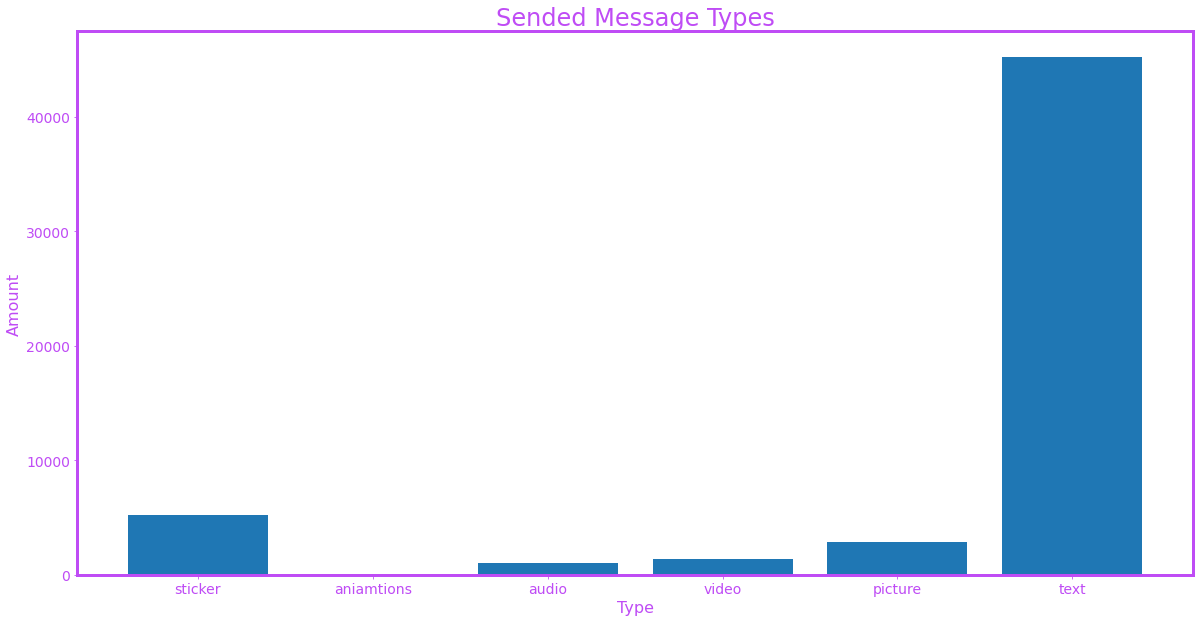

In [35]:
# Visualizations

# amount msg type visualization -> maybe donut chart
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
ax.bar(["sticker", "aniamtions", "audio", "video", "picture", "text"], 
        [amount_sticker_msg, amount_animations_msg, amount_audio_msg, amount_video_msg, amount_picture_msg, amount_text_msg])
ax.set_title("Sended Message Types", color="#bf4cf5", fontsize=24)
ax.set_xlabel("Type", color="#bf4cf5", fontsize=16)
ax.set_ylabel("Amount", color="#bf4cf5", fontsize=16)
ax.tick_params(axis='both', colors="#bf4cf5", labelsize=14)
ax.patch.set_facecolor('none')
# Add a thick border with color "#bf4cf5" around the plot
border_color = '#bf4cf5'  # Hex color code for the border
for spine in ax.spines.values():
    spine.set_edgecolor(border_color)
    spine.set_linewidth(3)  # Set the border thickness
plt.savefig('./export/sended_message_types.png') #, facecolor="white")

C:\Users\tobia\AppData\Local\Temp\ipykernel_33500\4153087482.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(date[::space_amount_dates], rotation=45)


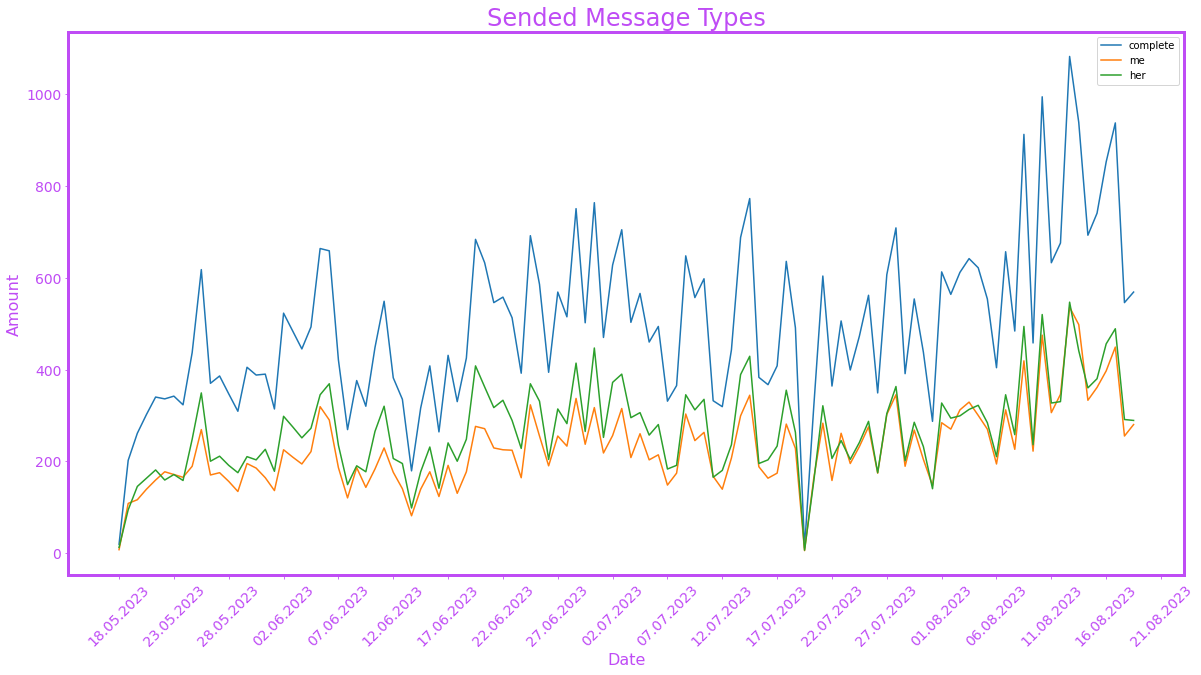

In [36]:
# Message sended
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
date, data = convert_dict_as_date_sorted_list(amount_msg_per_day)
ax.plot(date, data, label="complete")
date, data = convert_dict_as_date_sorted_list(amount_msg_from_me_per_day)
ax.plot(date, data, label="me")
date, data = convert_dict_as_date_sorted_list(amount_msg_from_her_per_day)
ax.plot(date, data, label="her")
ax.set_title("Sended Message Types", color="#bf4cf5", fontsize=24)

# x label
space_amount_dates = max(math.floor(len(date)/20), 1)
ax.set_xticklabels(date[::space_amount_dates], rotation=45)
ax.xaxis.set_major_locator(plt.MaxNLocator(len(date[::space_amount_dates])))

ax.set_xlabel("Date", color="#bf4cf5", fontsize=16)
ax.set_ylabel("Amount", color="#bf4cf5", fontsize=16)
ax.tick_params(axis='both', colors="#bf4cf5", labelsize=14)
ax.patch.set_facecolor('none')
# Add a thick border with color "#bf4cf5" around the plot
border_color = '#bf4cf5'  # Hex color code for the border
for spine in ax.spines.values():
    spine.set_edgecolor(border_color)
    spine.set_linewidth(3)  # Set the border thickness

ax.legend()
plt.savefig('./export/sended_message_types_2.png')

C:\Users\tobia\AppData\Local\Temp\ipykernel_33500\1984916422.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(date[::space_amount_dates], rotation=45)


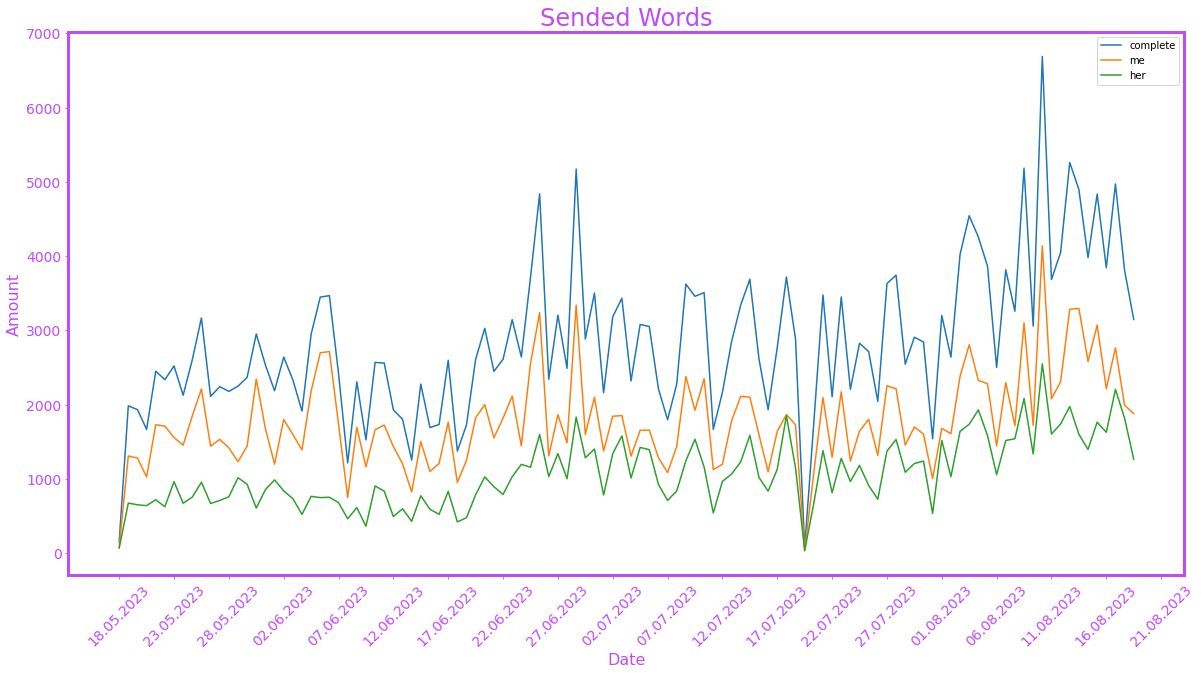

In [37]:
# Words sended
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
date, data = convert_dict_as_date_sorted_list(words_per_day)
ax.plot(date, data, label="complete")
date, data = convert_dict_as_date_sorted_list(words_per_day_from_me)
ax.plot(date, data, label="me")
date, data = convert_dict_as_date_sorted_list(words_per_day_from_her)
ax.plot(date, data, label="her")
ax.set_title("Sended Words", color="#bf4cf5", fontsize=24)

# x label
space_amount_dates = max(math.floor(len(date)/20), 1)
ax.set_xticklabels(date[::space_amount_dates], rotation=45)
ax.xaxis.set_major_locator(plt.MaxNLocator(len(date[::space_amount_dates])))

ax.set_xlabel("Date", color="#bf4cf5", fontsize=16)
ax.set_ylabel("Amount", color="#bf4cf5", fontsize=16)
ax.tick_params(axis='both', colors="#bf4cf5", labelsize=14)
ax.patch.set_facecolor('none')
# Add a thick border with color "#bf4cf5" around the plot
border_color = '#bf4cf5'  # Hex color code for the border
for spine in ax.spines.values():
    spine.set_edgecolor(border_color)
    spine.set_linewidth(3)  # Set the border thickness

ax.legend()
plt.savefig('./export/sended_words')

C:\Users\tobia\AppData\Local\Temp\ipykernel_33500\395807141.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(date[::space_amount_dates], rotation=45)


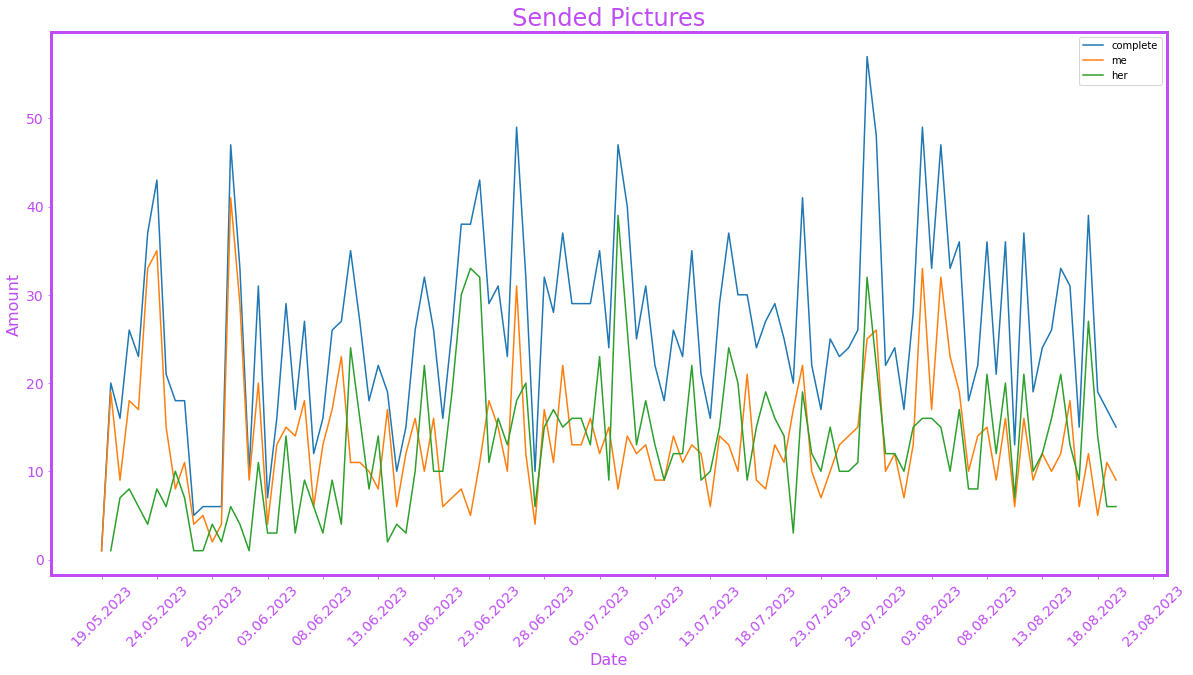

In [38]:
# Pictures sended
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
date, data = convert_dict_as_date_sorted_list(pictures_per_day)
ax.plot(date, data, label="complete")
date, data = convert_dict_as_date_sorted_list(pictures_per_day_from_me)
ax.plot(date, data, label="me")
date, data = convert_dict_as_date_sorted_list(pictures_per_day_from_her)
ax.plot(date, data, label="her")
ax.set_title("Sended Pictures", color="#bf4cf5", fontsize=24)

# x label
space_amount_dates = max(math.floor(len(date)/20), 1)
ax.set_xticklabels(date[::space_amount_dates], rotation=45)
ax.xaxis.set_major_locator(plt.MaxNLocator(len(date[::space_amount_dates])))

ax.set_xlabel("Date", color="#bf4cf5", fontsize=16)
ax.set_ylabel("Amount", color="#bf4cf5", fontsize=16)
ax.tick_params(axis='both', colors="#bf4cf5", labelsize=14)
ax.patch.set_facecolor('none')
# Add a thick border with color "#bf4cf5" around the plot
border_color = '#bf4cf5'  # Hex color code for the border
for spine in ax.spines.values():
    spine.set_edgecolor(border_color)
    spine.set_linewidth(3)  # Set the border thickness

ax.legend()
plt.savefig('./export/sended_pictures.png')

C:\Users\tobia\AppData\Local\Temp\ipykernel_33500\26522011.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(date[::space_amount_dates], rotation=45)


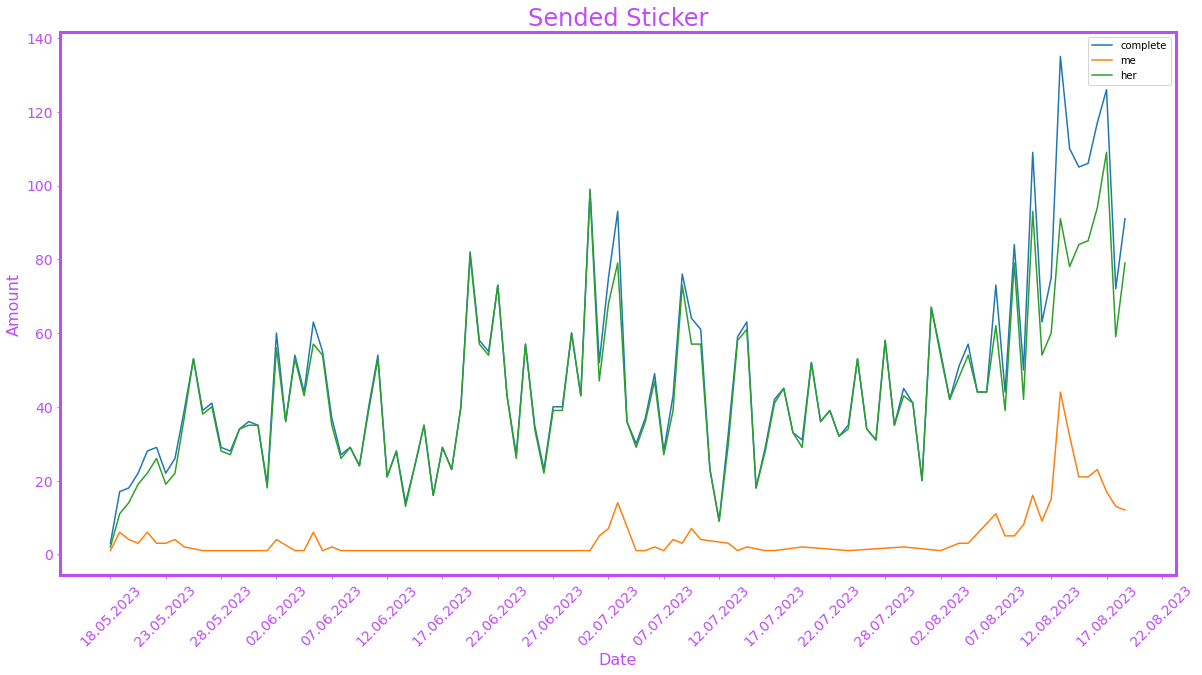

In [39]:
# Sticker sended
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
date, data = convert_dict_as_date_sorted_list(sticker_per_day)
ax.plot(date, data, label="complete")
date, data = convert_dict_as_date_sorted_list(sticker_per_day_from_me)
ax.plot(date, data, label="me")
date, data = convert_dict_as_date_sorted_list(sticker_per_day_from_her)
ax.plot(date, data, label="her")
ax.set_title("Sended Sticker", color="#bf4cf5", fontsize=24)

# x label
space_amount_dates = max(math.floor(len(date)/20), 1)
ax.set_xticklabels(date[::space_amount_dates], rotation=45)
ax.xaxis.set_major_locator(plt.MaxNLocator(len(date[::space_amount_dates])))

ax.set_xlabel("Date", color="#bf4cf5", fontsize=16)
ax.set_ylabel("Amount", color="#bf4cf5", fontsize=16)
ax.tick_params(axis='both', colors="#bf4cf5", labelsize=14)
ax.patch.set_facecolor('none')
# Add a thick border with color "#bf4cf5" around the plot
border_color = '#bf4cf5'  # Hex color code for the border
for spine in ax.spines.values():
    spine.set_edgecolor(border_color)
    spine.set_linewidth(3)  # Set the border thickness

ax.legend()
plt.savefig('./export/sended_sticker.png')

C:\Users\tobia\AppData\Local\Temp\ipykernel_33500\2168427266.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(date[::space_amount_dates], rotation=45)


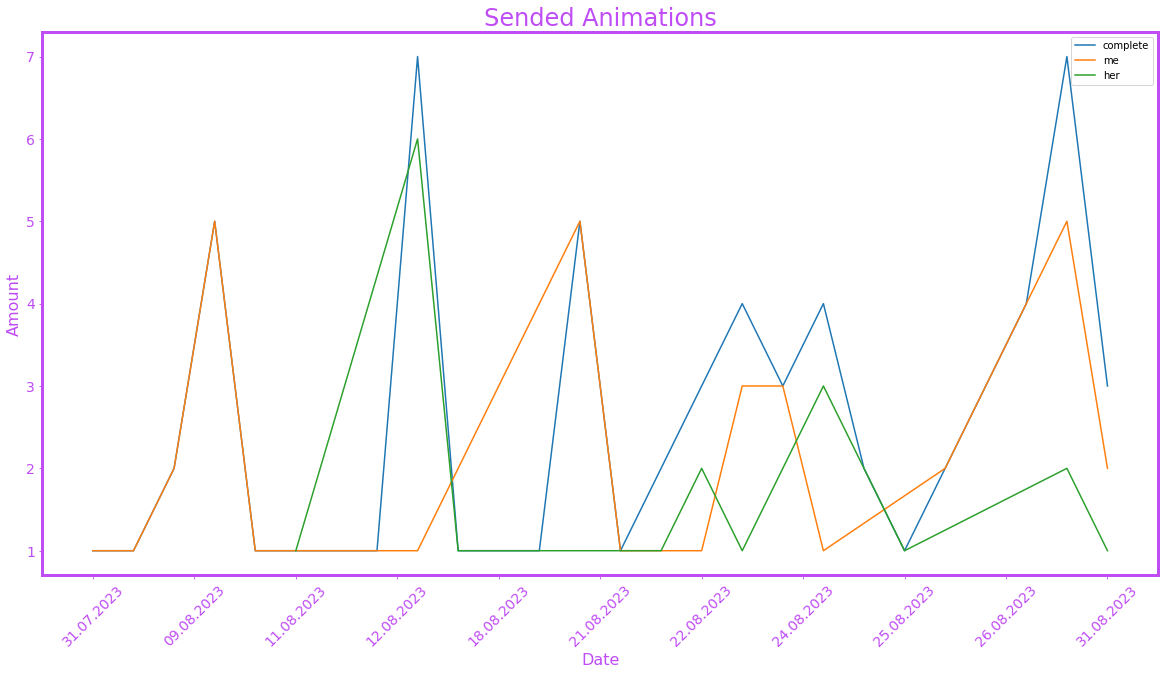

In [40]:
# Animation sended
if len(animations_per_day.values()) > 5:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
    date, data = convert_dict_as_date_sorted_list(animations_per_day)
    ax.plot(date, data, label="complete")
    date, data = convert_dict_as_date_sorted_list(animations_per_day_from_me)
    ax.plot(date, data, label="me")
    date, data = convert_dict_as_date_sorted_list(animations_per_day_from_her)
    ax.plot(date, data, label="her")
    ax.set_title("Sended Animations", color="#bf4cf5", fontsize=24)
    
    # x label
    space_amount_dates = max(math.floor(len(date)/20), 1)
    ax.set_xticklabels(date[::space_amount_dates], rotation=45)
    ax.xaxis.set_major_locator(plt.MaxNLocator(len(date[::space_amount_dates])))

    ax.set_xlabel("Date", color="#bf4cf5", fontsize=16)
    ax.set_ylabel("Amount", color="#bf4cf5", fontsize=16)
    ax.tick_params(axis='both', colors="#bf4cf5", labelsize=14)
    ax.patch.set_facecolor('none')
    # Add a thick border with color "#bf4cf5" around the plot
    border_color = '#bf4cf5'  # Hex color code for the border
    for spine in ax.spines.values():
        spine.set_edgecolor(border_color)
        spine.set_linewidth(3)  # Set the border thickness

    ax.legend()
    plt.savefig('./export/sended_animations.png')

C:\Users\tobia\AppData\Local\Temp\ipykernel_33500\1382976769.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(date[::space_amount_dates], rotation=45)


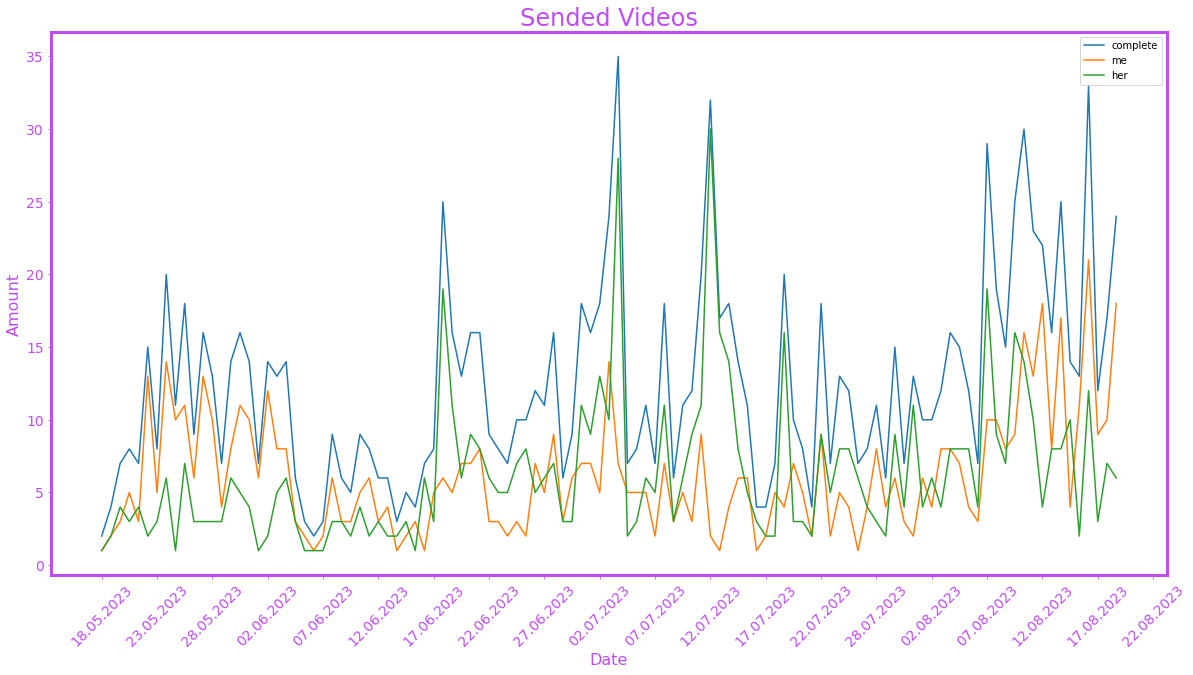

In [41]:
# Video sended
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
date, data = convert_dict_as_date_sorted_list(video_per_day)
ax.plot(date, data, label="complete")
date, data = convert_dict_as_date_sorted_list(video_per_day_from_me)
ax.plot(date, data, label="me")
date, data = convert_dict_as_date_sorted_list(video_per_day_from_her)
ax.plot(date, data, label="her")
ax.set_title("Sended Videos", color="#bf4cf5", fontsize=24)

# x label
space_amount_dates = max(math.floor(len(date)/20), 1)
ax.set_xticklabels(date[::space_amount_dates], rotation=45)
ax.xaxis.set_major_locator(plt.MaxNLocator(len(date[::space_amount_dates])))

ax.set_xlabel("Date", color="#bf4cf5", fontsize=16)
ax.set_ylabel("Amount", color="#bf4cf5", fontsize=16)
ax.tick_params(axis='both', colors="#bf4cf5", labelsize=14)
ax.patch.set_facecolor('none')
# Add a thick border with color "#bf4cf5" around the plot
border_color = '#bf4cf5'  # Hex color code for the border
for spine in ax.spines.values():
    spine.set_edgecolor(border_color)
    spine.set_linewidth(3)  # Set the border thickness

ax.legend()
plt.savefig('./export/sended_video.png')

C:\Users\tobia\AppData\Local\Temp\ipykernel_33500\2611938334.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(date[::space_amount_dates], rotation=45)


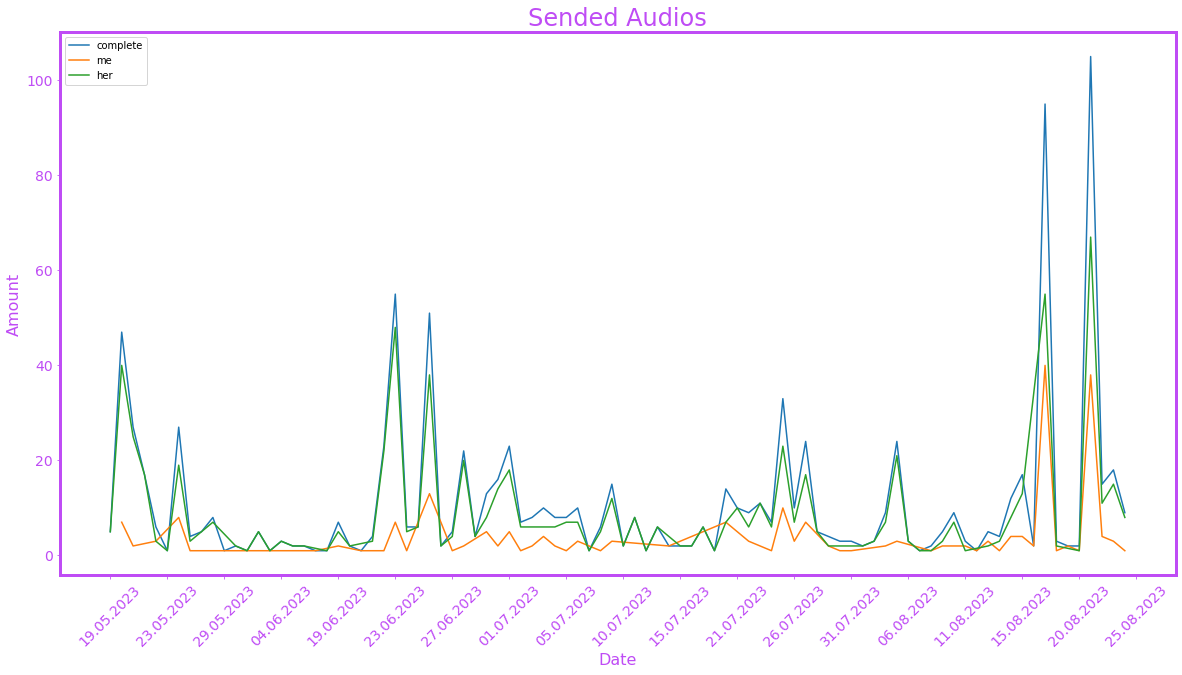

In [42]:
# Audio sended
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
date, data = convert_dict_as_date_sorted_list(audio_per_day)
ax.plot(date, data, label="complete")
date, data = convert_dict_as_date_sorted_list(audio_per_day_from_me)
ax.plot(date, data, label="me")
date, data = convert_dict_as_date_sorted_list(audio_per_day_from_her)
ax.plot(date, data, label="her")
ax.set_title("Sended Audios", color="#bf4cf5", fontsize=24)

# x label
space_amount_dates = max(math.floor(len(date)/20), 1)
ax.set_xticklabels(date[::space_amount_dates], rotation=45)
ax.xaxis.set_major_locator(plt.MaxNLocator(len(date[::space_amount_dates])))

ax.set_xlabel("Date", color="#bf4cf5", fontsize=16)
ax.set_ylabel("Amount", color="#bf4cf5", fontsize=16)
ax.tick_params(axis='both', colors="#bf4cf5", labelsize=14)
ax.patch.set_facecolor('none')
# Add a thick border with color "#bf4cf5" around the plot
border_color = '#bf4cf5'  # Hex color code for the border
for spine in ax.spines.values():
    spine.set_edgecolor(border_color)
    spine.set_linewidth(3)  # Set the border thickness

ax.legend()
plt.savefig('./export/sended_audio.png')

C:\Users\tobia\AppData\Local\Temp\ipykernel_33500\917758765.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(date[::space_amount_dates], rotation=45)


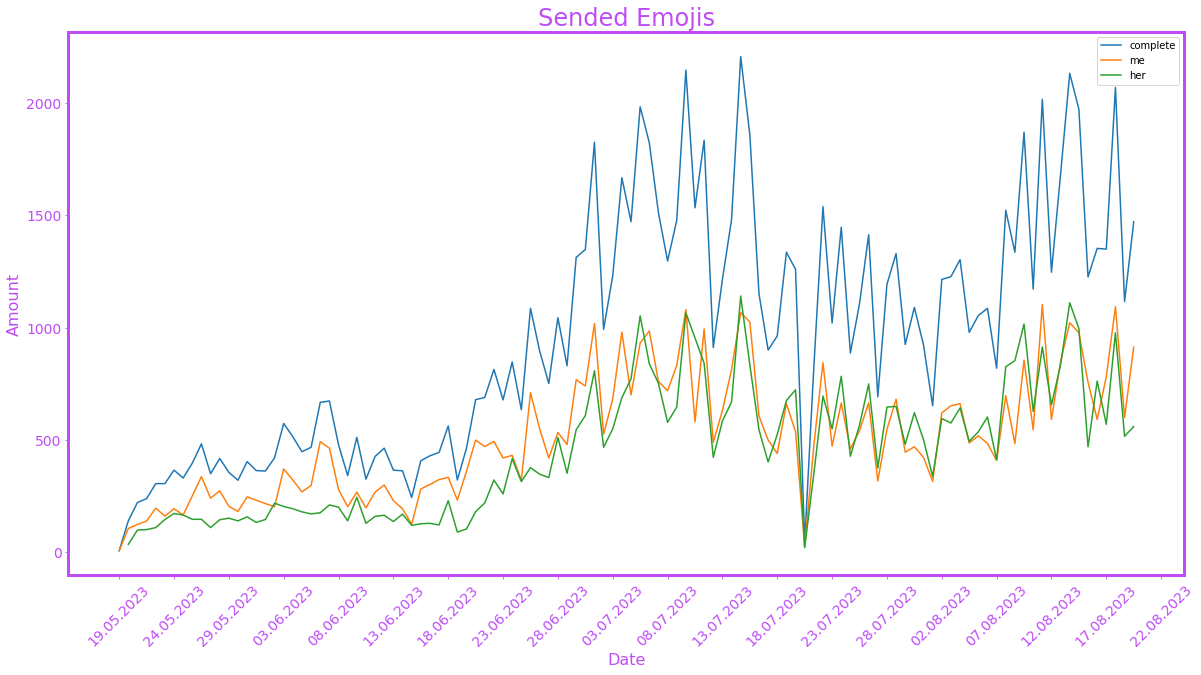

In [43]:
# Emoji sended
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
date, data = convert_dict_as_date_sorted_list(emoji_per_day)
ax.plot(date, data, label="complete")
date, data = convert_dict_as_date_sorted_list(emoji_per_day_from_me)
ax.plot(date, data, label="me")
date, data = convert_dict_as_date_sorted_list(emoji_per_day_from_her)
ax.plot(date, data, label="her")
ax.set_title("Sended Emojis", color="#bf4cf5", fontsize=24)

# x label
space_amount_dates = max(math.floor(len(date)/20), 1)
ax.set_xticklabels(date[::space_amount_dates], rotation=45)
ax.xaxis.set_major_locator(plt.MaxNLocator(len(date[::space_amount_dates])))

ax.set_xlabel("Date", color="#bf4cf5", fontsize=16)
ax.set_ylabel("Amount", color="#bf4cf5", fontsize=16)
ax.tick_params(axis='both', colors="#bf4cf5", labelsize=14)
ax.patch.set_facecolor('none')
# Add a thick border with color "#bf4cf5" around the plot
border_color = '#bf4cf5'  # Hex color code for the border
for spine in ax.spines.values():
    spine.set_edgecolor(border_color)
    spine.set_linewidth(3)  # Set the border thickness

ax.legend()
plt.savefig('./export/sended_emojis.png')

wordclouds ☁️

In [44]:
segments_list = jieba.cut(text_complete)
segments_text = " ".join(segments_list)

to_replace = [letter for letter in list(string.ascii_lowercase + string.ascii_uppercase)]
segments_list = jieba.cut(replace_elems_in_str(text_complete, to_replace))
segments_text_only_ch = " ".join(segments_list)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\tobia\AppData\Local\Temp\jieba.cache
Loading model cost 0.589 seconds.
Prefix dict has been built successfully.


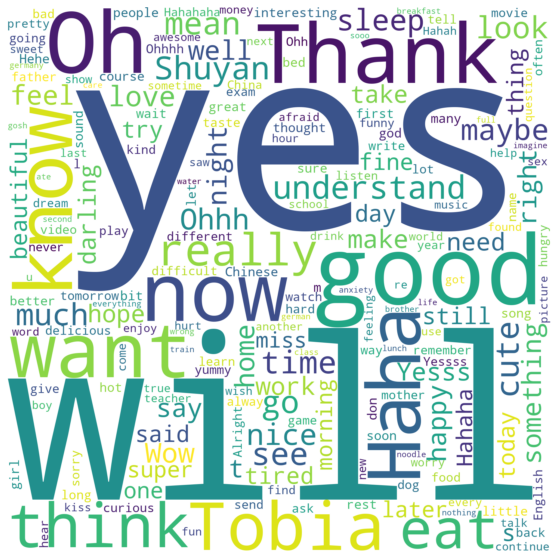

In [45]:
# Wordclouds
wordcloud = WordCloud(collocations=False, width=2000, height=2000, background_color="white").generate(text_complete)

plt.figure(figsize = (10,10))
plt.axis("off")
plt.imshow(wordcloud, interpolation = "bilinear")
plt.savefig('./export/wordcloud_1.png')

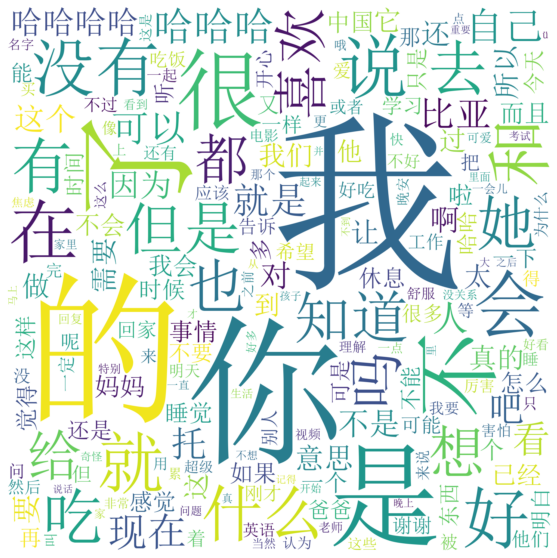

In [46]:
wordcloud = WordCloud(collocations=False, width=2000, height=2000, background_color="white", font_path="C:/Windows/Fonts/simsun.ttc").generate(segments_text_only_ch)

plt.figure(figsize = (10,10))
plt.axis("off")
plt.imshow(wordcloud, interpolation = "bilinear")
plt.savefig('./export/wordcloud_2.png')

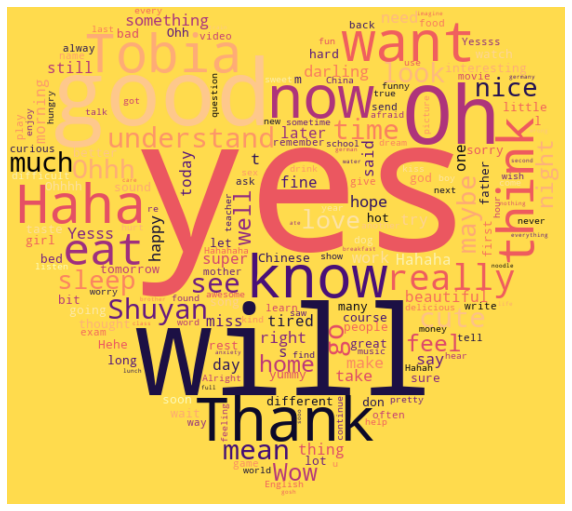

In [47]:
name = "love"
im_mask = np.array(PIL.Image.open(f"./res/{name}.png"))

wordcloud = WordCloud(width = 2000, height = 2000, mask=im_mask, colormap="magma",
                            background_color="#ffdb4d", collocations=False,
                            contour_color="#ffdb4d",contour_width=0.1).generate(text_complete)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.savefig('./export/wordcloud_3.png')

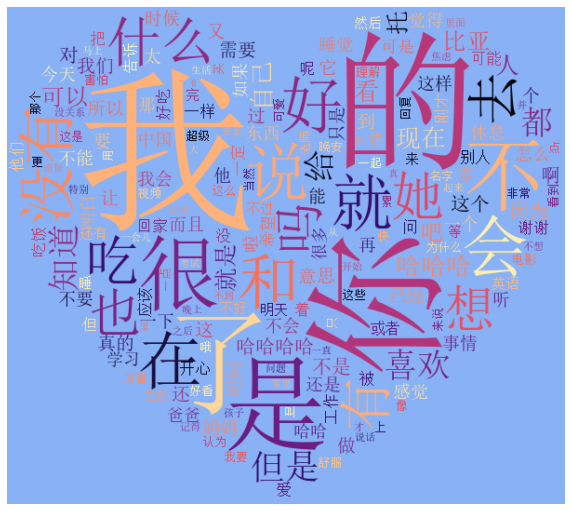

In [48]:
name = "love"
im_mask = np.array(PIL.Image.open(f"./res/{name}.png"))

wordcloud = WordCloud(width = 2000, height = 2000, mask=im_mask, colormap="magma",
                            background_color="#89b1f5", collocations=False,
                            contour_color="#89b1f5",contour_width=0.1, font_path="C:/Windows/Fonts/simsun.ttc").generate(segments_text_only_ch)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.savefig('./export/wordcloud_4.png')

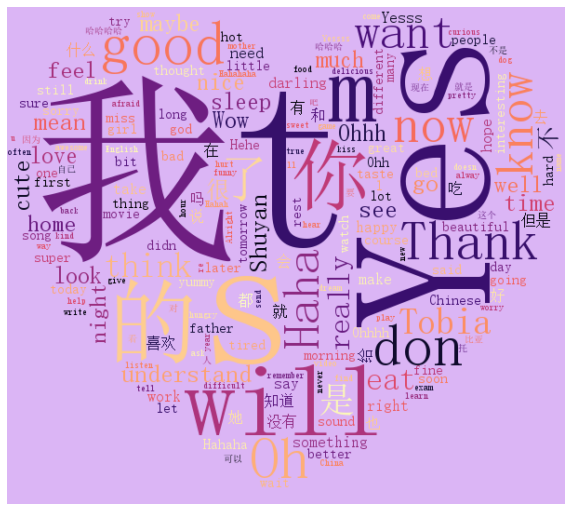

In [49]:


wordcloud = WordCloud(width = 2000, height = 2000, mask=im_mask, colormap="magma",
                            background_color="#dbb5f5", collocations=False,
                            contour_color='#dbb5f5',contour_width=0.1, font_path="C:/Windows/Fonts/simsun.ttc").generate(segments_text)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.savefig('./export/wordcloud_5.png')

---

<br>
For the most beautiful woman in this world ❤️<br>
In love, Tobia 😊🥰😘😘😘

---

### Code Statistics

In [50]:
import nbformat
import ast

def count_code_lines_defs_vars(notebook_path):
    with open(notebook_path, 'r', encoding='utf-8') as f:
        notebook = nbformat.read(f, nbformat.NO_CONVERT)

    code_lines = 0
    defs_count = 0
    vars_count = 0

    for cell in notebook.cells:
        if cell.cell_type == 'code':
            code_lines += len(cell['source'].split('\n'))
            defs_count += cell['source'].count('def')
            parsed_ast = ast.parse(cell['source'])
            vars_count += sum(isinstance(node, ast.Name) and isinstance(node.ctx, ast.Store) for node in ast.walk(parsed_ast))

    return code_lines, defs_count, vars_count

# Provide the path to your .ipynb file
notebook_path = './chat_analysis.ipynb'

code_lines, defs_count, vars_count = count_code_lines_defs_vars(notebook_path)
print(f"Number of code lines: {code_lines}")
print(f"Number of function definitions: {defs_count}")
print(f"Number of variables: {vars_count}")

Number of code lines: 1969
Number of function definitions: 46
Number of variables: 625


---

### HTML & PDF Export

In [51]:
class Website:

    def __init__(self, name=f"Tobia_x_Shuyan_Chatanalysis_{FROM_DATE}-{DATE}"):
        
        self.header = f"\
<!doctype html>\n\
<html>\n\
<head>\n\
    <title>{name}</title>\n\
    <meta charset='utf-8'>\n\
    <meta http-equiv=\"X-UA-Compatible\" content=\"ie=edge\">\n\
    <meta name='viewport' content='width=device-width, initial-scale=1' viewport-fit=cover>\n\
    <link rel=\"stylesheet\" href=\"chat_analysis.css\">\n\
</head>"

        self.body = "<body>\n"
        self.tail = "</body>\n</html>"
        self.orientation = "left"
        self.name = name

    def add(self, content:str):
        self.body += f"\n{content}"

    def add_text(self, content:str, orientation="left", type="p", bold=False):
        style = f"text-align:{orientation}"
        if bold == False:
            style += f";font-weight:normal;'"
        self.body += f"\n    <{type} style='{style}'>{content}</{type}>"

    def add_space(self, space_in_px=10, vertical_spacing=True):
        if vertical_spacing:
            self.body += f"\n    <p style='margin-top:{space_in_px}px'></p>"
        else:
            self.body += f"\n    <p style='margin-left:{space_in_px}px'></p>"

    def add_br_space(self, amount=2):
        self.body += f"\n   <p>{'<br>'*amount}</p>"

    def add_image(self, img_path:str, width=100, orientation="left", float_left=False):
        #img_path = f"file://{os.path.abspath(img_path)}"
        style = f"text-align:{orientation}"
        if float_left:
            style += ";float:left;"
        self.body += f"\n    <div style='{style}'><img src=\"{img_path}\" width='{width}%' style='text-align:{orientation}'><img/></div>"

    def add_list(self, content:str, orientation="left"):
        self.body += self.create_list(content)

    def create_list(self, content:list) -> str:
        cache = "\n        <ul>"
        for elem in content:
            if type(elem) == list:
                cache += "\n    <li><ul>"
                for elem_elem in elem:
                    cache += f"<li>{elem_elem}</li>"
                cache += "</ul></li>"
            else:
                cache += f"\n    <li>{elem}</li>"
        cache += "\n    </ul>"
        return cache

    def get_html_code(self) -> str:
        return f"{self.header}\n\n{self.body}\n\n{self.tail}"

    def save_html_code(self, path:str, set_auto_name=True):
        html_code = self.get_html_code()
        if set_auto_name:
            path = f"{path}/{self.name}.html"
        
        with open(path, "w", encoding="utf-8") as f:
            f.write(html_code)

        return path


    def create_pdf(self, path:str):
        pass

In [52]:
# create HTML
html = Website()

SPACE_BETWEEN = 50
WIDTH = 75

html.add("<embed name=\"Song for Shuyan\" src=\"shuyanbackgroundmusic.mp3\" loop=\"true\" hidden=\"true\" autostart=\"true\">")

moon_bg = '    <div class="moon">\n\
        <span class="crater"></span>\n\
        <span class="crater"></span>\n\
        <span class="crater"></span>\n\
        <span class="crater"></span>\n\
    </div>\n\n\
    <div class="shooting">\n\
        <div class="core"></div>\n\
        <div class="trail"></div>\n\
    </div>\n\n\
    <script src="chat_analysis.js"></script>'
html.add(moon_bg)

html.add_text("Chat Analysis", orientation="center", type="h1", bold=True)
html.add_text("🔥Tobia x Shuyan🔥", orientation="center", type="h2", bold=True)
html.add_text(f"Between {FROM_DATE_NOT_AMERICAN} - {DATE_NOT_AMERICAN}", orientation="center", type="h3")

html.add_br_space(amount=4)

html.add_text(f"Dear 书言,<br>I hope you doing great darling.<br>You know I love data and my work is data.<br>\
So I decided to use my skills to analyze our chat.<br>I hope you find it interesting. I had much fun doing that!<br>\
I needed {code_lines} code lines, defined {defs_count} functions and used a total of {vars_count} variables.")
html.add_text(">>> Chat-Analysis Results: Tobia and Shuyan <<<<br><br>(me=Tobia=托比亚, her=Shuyan=书言)")


html.add_space(space_in_px=SPACE_BETWEEN)
html.add_space(space_in_px=SPACE_BETWEEN)
html.add_br_space(amount=2)

text_cache = f"Amount of messages: {amount_msg}<br>"
text_cache += f"&emsp;from me: {amount_msg_from_me}<br>"
text_cache += f"&emsp;from her: {amount_msg_from_her}<br>"
html.add_text(text_cache)

html.add_space(space_in_px=SPACE_BETWEEN)

text_cache = f"Amount of text messages:{amount_text_msg}<br>"
text_cache += f"Average amount of text messages per day:{calc_mean(text_msg_per_day)}<br>"
text_cache += f"&emsp;from me:{calc_mean(text_msg_per_day_from_me)}<br>"
text_cache += f"&emsp;from her:{calc_mean(text_msg_per_day_from_her)}<br>"
html.add_text(text_cache)

html.add_space(space_in_px=SPACE_BETWEEN)

text_cache = f"Amount of words:{amount_words}<br>"
text_cache += f"Average amount of words per day:{calc_mean(words_per_day)}<br>"
text_cache += f"&emsp;from me:{calc_mean(words_per_day_from_me)}<br>"
text_cache += f"&emsp;from her:{calc_mean(words_per_day_from_her)}<br>"
text_cache += f"Top used words:<br>"
top_used = get_elem_with_top_amount(words, amount=5)
for i, x in enumerate(top_used):
    key, value = x
    text_cache += f"&emsp;{i+1}. {key} ({value})<br>"
html.add_text(text_cache)

html.add_space(space_in_px=SPACE_BETWEEN)

text_cache = f"Amount of pictures:{amount_picture_msg}<br>"
text_cache += f"Average amount of picture messages per day:{calc_mean(pictures_per_day)}<br>"
text_cache += f"&emsp;from me:{calc_mean(pictures_per_day_from_me)}<br>"
text_cache += f"&emsp;from her:{calc_mean(pictures_per_day_from_her)}<br>"
# text_cache += f"Top used pictures:<br>"
# top_used = get_elem_with_top_amount(pictures, amount=5)
# for i, x in enumerate(top_used):
#     key, value = x
#     text_cache += f"&emsp;{i+1}. {key} ({value})<br>"
html.add_text(text_cache)

html.add_space(space_in_px=SPACE_BETWEEN)

text_cache = f"Amount of video:{amount_video_msg}<br>"
text_cache += f"Average amount of video messages per day:{calc_mean(video_per_day)}<br>"
text_cache += f"&emsp;from me:{calc_mean(video_per_day_from_me)}<br>"
text_cache += f"&emsp;from her:{calc_mean(video_per_day_from_her)}<br>"
# text_cache += f"Top used video:<br>"
# top_used = get_elem_with_top_amount(video, amount=5)
# for i, x in enumerate(top_used):
#     key, value = x
#     text_cache += f"&emsp;{i+1}. {key} ({value})<br>"
html.add_text(text_cache)

html.add_space(space_in_px=SPACE_BETWEEN)

text_cache = f"Amount of emoji:{amount_emojis}<br>"
text_cache += f"Average amount of emoji messages per day:{calc_mean(emoji_per_day)}<br>"
text_cache += f"&emsp;from me:{calc_mean(emoji_per_day_from_me)}<br>"
text_cache += f"&emsp;from her:{calc_mean(emoji_per_day_from_her)}<br>"
text_cache += f"Top used emoji:<br>"
top_used = get_elem_with_top_amount(emoji, amount=5)
for i, x in enumerate(top_used):
    key, value = x
    text_cache += f"&emsp;{i+1}. {key} ({value})<br>"
html.add_text(text_cache)

html.add_space(space_in_px=SPACE_BETWEEN)

text_cache = f"Amount of sticker:{amount_sticker_msg}<br>"
text_cache += f"Average amount of sticker messages per day:{calc_mean(sticker_per_day)}<br>"
text_cache += f"&emsp;from me:{calc_mean(sticker_per_day_from_me)}<br>"
text_cache += f"&emsp;from her:{calc_mean(sticker_per_day_from_her)}<br>"
# text_cache += f"Top used sticker:<br>"
# top_used = get_elem_with_top_amount(sticker, amount=5)
# for i, x in enumerate(top_used):
#     key, value = x
#     text_cache += f"&emsp;{i+1}. {key} ({value})<br>"
html.add_text(text_cache)

# html.add_space()

# text_cache = f"Amount of animations:{amount_animations_msg}<br>"
# text_cache += f"Average amount of animations messages per day:{calc_mean(animations_per_day)}<br>"
# text_cache += f"&emsp;from me:{calc_mean(animations_per_day_from_me)}<br>"
# text_cache += f"&emsp;from her:{calc_mean(animations_per_day_from_her)}<br>"
# text_cache += f"Top used animations:<br>"
# top_used = get_elem_with_top_amount(animations, amount=5)
# for i, x in enumerate(top_used):
#     key, value = x
#     text_cache += f"&emsp;{i+1}. {key} ({value})<br>"
# html.add_text(text_cache)

html.add_space(space_in_px=SPACE_BETWEEN)

html.add_text(f"{longest_streak_in_days} in a row daily written! From {longest_streak_first_date} to {longest_streak_last_date} 🔥")

html.add_space(space_in_px=SPACE_BETWEEN)
html.add_space(space_in_px=SPACE_BETWEEN)
html.add_space(space_in_px=SPACE_BETWEEN)

html.add_image("./sended_message_types.png", width=WIDTH, orientation="center")
html.add_text("This shows which kind of messages we sent.", orientation="center")

html.add_space(space_in_px=SPACE_BETWEEN)

html.add_image("./sended_message_types_2.png", width=WIDTH, orientation="center")
html.add_image("./sended_words.png", width=WIDTH, orientation="center")
html.add_text("You send more and shorter messages. I send less but longer messages 😊", orientation="center")

html.add_space(space_in_px=SPACE_BETWEEN)
html.add_space(space_in_px=SPACE_BETWEEN)
html.add_space(space_in_px=SPACE_BETWEEN)

html.add_image("./sended_pictures.png", width=WIDTH, orientation="center")
html.add_image("./sended_audio.png", width=WIDTH, orientation="center")
html.add_text("I love pictures, you love audios 🥰", orientation="center")

html.add_space(space_in_px=SPACE_BETWEEN)

html.add_image("./sended_sticker.png", width=WIDTH, orientation="center")
html.add_text("You love Stickers 😘", orientation="center")
html.add_image("./sended_emojis.png", width=WIDTH, orientation="center")
html.add_text("I’m more the oldschool emoji user 😊😂", orientation="center")

html.add_space(space_in_px=SPACE_BETWEEN)
html.add_space(space_in_px=SPACE_BETWEEN)
html.add_space(space_in_px=SPACE_BETWEEN)

html.add_text("At least I created word clouds from all our sent messages:")
html.add_image("./wordcloud_1.png", float_left=True, width=100, orientation="center")
html.add_image("./wordcloud_2.png", float_left=True, width=100, orientation="center")
html.add_image("./wordcloud_3.png", float_left=True, width=100, orientation="center")
html.add_image("./wordcloud_4.png", float_left=True, width=100, orientation="center")
html.add_image("./wordcloud_5.png", float_left=True, width=100, orientation="center")

In [53]:
print(html.get_html_code())

<!doctype html>
<html>
<head>
    <title>Tobia_x_Shuyan_Chatanalysis_2023-05-13-2023-09-01</title>
    <meta charset='utf-8'>
    <meta http-equiv="X-UA-Compatible" content="ie=edge">
    <meta name='viewport' content='width=device-width, initial-scale=1' viewport-fit=cover>
    <link rel="stylesheet" href="chat_analysis.css">
</head>

<body>

<embed name="Song for Shuyan" src="shuyanbackgroundmusic.mp3" loop="true" hidden="true" autostart="true">
    <div class="moon">
        <span class="crater"></span>
        <span class="crater"></span>
        <span class="crater"></span>
        <span class="crater"></span>
    </div>

    <div class="shooting">
        <div class="core"></div>
        <div class="trail"></div>
    </div>

    <script src="chat_analysis.js"></script>
    <h1 style='text-align:center'>Chat Analysis</h1>
    <h2 style='text-align:center'>🔥Tobia x Shuyan🔥</h2>
    <h3 style='text-align:center;font-weight:normal;''>Between 13.05.2023 - 01.09.2023</h3>
   <p><br><br

In [54]:
# normal save
#PDF_PATH = f"{GROUND_PATH}/{FROM_DATE_NOT_AMERICAN}_Chatanalysis_Tobia_x_Shuyan_Export.pdf"
#HTML_PATH = f"{GROUND_PATH}"
PDF_PATH = f"./export/backup/{DATE_NOT_AMERICAN}_Chatanalysis_Tobia_x_Shuyan_Export.pdf"
HTML_PATH = f"./export/index.html"
wkhtmltopdf_PATH = "D:/Programme (real)/wkhtmltopdf/bin/wkhtmltopdf.exe"

COMPLETE_HTML_PATH = html.save_html_code(HTML_PATH, set_auto_name=False)

# PDF Backup save
config = pdfkit.configuration(wkhtmltopdf=wkhtmltopdf_PATH)
#pdfkit.from_string(html.get_html_code(), output_path=PDF_PATH, configuration=config)
pdfkit.from_file(COMPLETE_HTML_PATH, output_path=PDF_PATH, configuration=config, options={"encoding":"utf-8", "enable-local-file-access":True})
# there is als pdfkit.from_url ^^

True

In [55]:
# backup save
HTML_PATH = f"./export/backup"
wkhtmltopdf_PATH = "D:/Programme (real)/wkhtmltopdf/bin/wkhtmltopdf.exe"

html.save_html_code(HTML_PATH)

'./export/backup/Tobia_x_Shuyan_Chatanalysis_2023-05-13-2023-09-01.html'

In [56]:
# crete css
css = """
html {
    /* height: 100%; */
    height: auto;
    overflow-x: hidden; /* Prevent horizontal scrolling */
}

body {
    font-family: Consolas, monospace;
    /* height: 100%; */
    height: auto;
    background: linear-gradient(#0f1a2b, #791ccf); /* #411d63 */
    color: #d4a5e6;
    overflow-x: hidden; /* Prevent horizontal scrolling */
    }

h1 {
    font-size: 36px;
    text-align: center;
}

h2 {
    font-size: 18px;
    text-align: center;
}

h3 {
    font-size: 16px;
    text-align: center;
    font-weight: normal;
}

p {
    margin-left: 30px;
}

.img-container {
    text-align: center;
    display: block;
}

.moon {
    width: 100px;
    height: 100px;
    border-radius: 50%;
    background: #ffffdd;
    box-shadow: inset -11px -8px 0px 4px #feffa2, 0px 0px 10px 0px #feffa2, 0px 0px 50px 0px #feffa2, 0px 0px 500px 0px #feffa2;
    display: inline-block;
    position: relative;
    top: 10%;
    left: 10%;
    margin-top: 40px;
    animation: 3s moonglow ease-in-out infinite alternate;
}

.crater {
    position: absolute;
    background: rgba(255, 244, 118, 1);
    border-radius: 50%;
    box-shadow: inset 1px 1px 0px 1px #ecec79;
}

.crater:nth-child(1) {
    width: 25px;
    height: 25px;
    top: 57%;
    left: 30%;
}

.crater:nth-child(2) {
    width: 16px;
    height: 16px;
    top: 30%;
    left: 23%;
}

.crater:nth-child(3) {
    width: 12px;
    height: 12px;
    top: 50%;
    left: 14%;
}

.crater:nth-child(4) {
    width: 30px;
    height: 30px;
    top: 20%;
    left: 30%;
    box-shadow: none;
    background: rgba(255, 244, 118, 0.3);
}

.star {
    position: absolute;
    width: 1px;
    height: 1px;
    border-radius: 50%;
    animation-iteration-count: infinite;
}

.shooting {
    position: relative;
    top: 30%;
    left: 30%;
    width: 300px;
    height: 5px;
    border-radius: 5px;
    display: inline-block;
    transform: rotateZ(-30deg);
}

.shooting .core {
    display: inline-block;
    position: absolute;
    top: 0;
    left: 0;
    width: 4px;
    height: 4px;
    border-radius: 50%;
    background: #ffff84;
    box-shadow: 0px 0px 3px 1px rgba(255, 245, 131, 0.5), 0px 0px 10px 5px rgba(255, 245, 131, 0.2);
    animation: 6s linear infinite core;
}

.shooting .trail {
    display: inline-block;
    position: absolute;
    content: '';
    width: 100px;
    height: 5px;
    border-radius: 50% 0 0 50%;
    background: linear-gradient( to right, rgba(255, 245, 174, 0.7), rgba(255, 245, 174, 0.2) 50%, transparent);
    top: -1px;
    left: 0;
    animation: 6s linear infinite trail;
}

@keyframes glow {
    0% {
        opacity: 1;
    }
    50% {
        opacity: 0.3;
    }
    100% {
        opacity: 1;
    }
}

@keyframes moonglow {
    0% {
        transform: scale(1);
    }
    100% {
        transform: scale(1.02);
    }
}

@keyframes core {
    0% {
        left: 100%;
        opacity: 1;
    }
    5% {
        left: 60%;
        opacity: 0.8;
    }
    10% {
        left: 0;
        opacity: 0;
    }
    100% {
        left: 0;
        opacity: 0;
    }
}

@keyframes trail {
    0% {
        left: 100%;
        opacity: 1;
        width: 0;
    }
    5% {
        left: 65%;
        opacity: 0.5;
        width: 150px;
    }
    10% {
        left: 0;
        opacity: 0;
        width: 150px;
    }
    100% {
        left: 0;
        opacity: 0;
        width: 150px;
    }
}

@media (max-width: 768px) {
    body {
        font-size: 14px; 
    }

    h1 {
        font-size: 24px; 
    }

}



"""

with open("./export/chat_analysis.css", "w") as f:
    f.write(css)

In [57]:
# crete css
js = """
(() => {

    // STAR SPWNING - New Stars
    // Define the maximum number of stars to create
    const max_stars = 250*10;
    let starCount = 0;
    const stars = [];

    // Function to create and append a star element
    const createStar = () => {

        const star = document.createElement('span');
        star.className = 'star';

        // Generate a random size for the star (between 1 and 4 pixels)
        const size = Math.floor(Math.random() * 4) + 1;
        star.style.width = size + 'px';
        star.style.height = size + 'px';

        // Generate a random background color for the star with some opacity
        star.style.background = `rgba(255, 255, 177, ${Math.random()})`;

        // Calculate random positions within the entire document
        const pageWidth = window.innerWidth;
        const pageHeight = Math.max(
            document.body.scrollHeight,
            document.body.offsetHeight,
            document.documentElement.clientHeight,
            document.documentElement.scrollHeight,
            document.documentElement.offsetHeight
        );

        const randomLeft = Math.floor(Math.random() * pageWidth);
        const randomTop = Math.floor(Math.random() * pageHeight);

        star.style.left = randomLeft + 'px';
        star.style.top = randomTop + 'px';

        // make star glow given some probiltility
        if (Math.random() <= 0.6) {
            // Apply a CSS animation called 'glow' to the star
            star.style.animationName = 'glow';

            // Set a random delay for the animation (between 1 and 20 seconds)
            star.style.animationDelay = (Math.floor(Math.random() * 20) + 1) + 's';

            // Set a random duration for the animation (between 1 and 6 seconds)
            star.style.animationDuration = (Math.floor(Math.random() * 6) + 1) + 's';
        }

        // Add the star element to the 'stars' array
        stars.push(star);
        document.body.appendChild(star);
        starCount++;

        // // Remove the star element after a random time between 5 and 20 seconds
        // const randomRemoveTime = Math.random() * 15000 + 5000; // Random time between 5 and 20 seconds
        // setTimeout(() => {
        //     star.remove();
        // }, randomRemoveTime);
    };

    // Function to create stars at random intervals between 0.5 and 5 seconds
    const createStarsContinuously = () => {
        if (starCount < max_stars) {
            //const randomInterval = Math.random() * 500 + 0; // Random interval between 0.5 and 5 seconds
            setTimeout(() => {
                createStar();
                createStarsContinuously(); // Create stars continuously
            }, 0);
        }
    };

    // Call the function to create stars initially
    createStarsContinuously();


    // SHOOTING STAR
    // Get a reference to the shooting star element
    const shootingStar = document.querySelector('.shooting');

    // Function to change the position of the shooting star
    function changeStarPosition() {
        // Calculate new random top and left positions
        const newTop = Math.floor(Math.random() * 100) + '%';
        const newLeft = Math.floor(Math.random() * 100) + '%';

        // Apply the new positions to the shooting star
        shootingStar.style.top = newTop;
        shootingStar.style.left = newLeft;
    }

    // Call the function to change the position initially
    changeStarPosition();

    // Set an interval to change the position periodically (e.g., every 5 seconds)
    setInterval(changeStarPosition, 5000); // Change position every 5 seconds

})();


// OLD CODE
// // STAR SPAWNING - Basic Stars on top
    // // Define the maximum number of stars to create
    // const max_stars = 250;

    // // Create an empty array to store the star elements
    // const stars = [];

    // // Function to calculate random top and left positions within the entire page
    // const getRandomPosition = () => {
    //     const pageWidth = window.innerWidth;
    //     const pageHeight = Math.max(
    //         document.body.scrollHeight,
    //         document.body.offsetHeight,
    //         document.documentElement.clientHeight,
    //         document.documentElement.scrollHeight,
    //         document.documentElement.offsetHeight
    //     );

    //     // console.log('Full page height:', pageHeight, 'pixels');

    //     const randomLeft = Math.floor(Math.random() * pageWidth);
    //     const randomTop = Math.floor(Math.random() * pageHeight);

    //     // console.log('Star spawn: X='+ randomLeft+ ', y='+randomTop);

    //     return { left: randomLeft, top: randomTop };
    // };

    // // Create stars and add them to the webpage
    // for (let i = 0; i < max_stars; i++) {
    //     // Create a new <span> element for a star
    //     const star = document.createElement('span');

    //     // Generate a random size for the star (between 1 and 4 pixels)
    //     const size = (Math.floor(Math.random() * 4) + 1);

    //     // Set the CSS class for the star
    //     star.className = 'star';

    //     // Set the star's width and height
    //     star.style.width = size + 'px';
    //     star.style.height = size + 'px';

    //     // Generate a random background color for the star with some opacity
    //     star.style.background = `rgba(255, 255, 177, ${Math.random()})`;

    //     // old positioning
    //     // // Randomly position the star within the viewport (top and left)
    //     // star.style.top = Math.ceil(Math.random() * 100) + '%';
    //     // star.style.left = Math.ceil(Math.random() * 100) + '%';

    //     // new positioning
    //     // Get random position within the entire page
    //     const { left, top } = getRandomPosition();
    //     star.style.left = left + 'px';
    //     star.style.top = top + 'px';

    //     // Add the star element to the 'stars' array
    //     stars.push(star);

    //     // Append the star element to the HTML body
    //     document.body.appendChild(star);
    // }

  // // STAR GLOWING
    // // Make some of the stars "glow" by applying CSS animations
    // for (let j = 0; j < max_stars * 0.6; j++) {
    //     // Get a reference to a star element from the 'stars' array
    //     const star = stars[j];

    //     // Apply a CSS animation called 'glow' to the star
    //     star.style.animationName = 'glow';

    //     // Set a random delay for the animation (between 1 and 20 seconds)
    //     star.style.animationDelay = (Math.floor(Math.random() * 20) + 1) + 's';

    //     // Set a random duration for the animation (between 1 and 6 seconds)
    //     star.style.animationDuration = (Math.floor(Math.random() * 6) + 1) + 's';
    // }

"""

with open("./export/chat_analysis.js", "w") as f:
    f.write(js)

---